<a href="https://colab.research.google.com/github/desbaa32/Master2BD_tp_pro/blob/master/TP_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exercice 3:** Self-Attention mechanism: Compute word embeddings

Chargement du modèle GloVe 


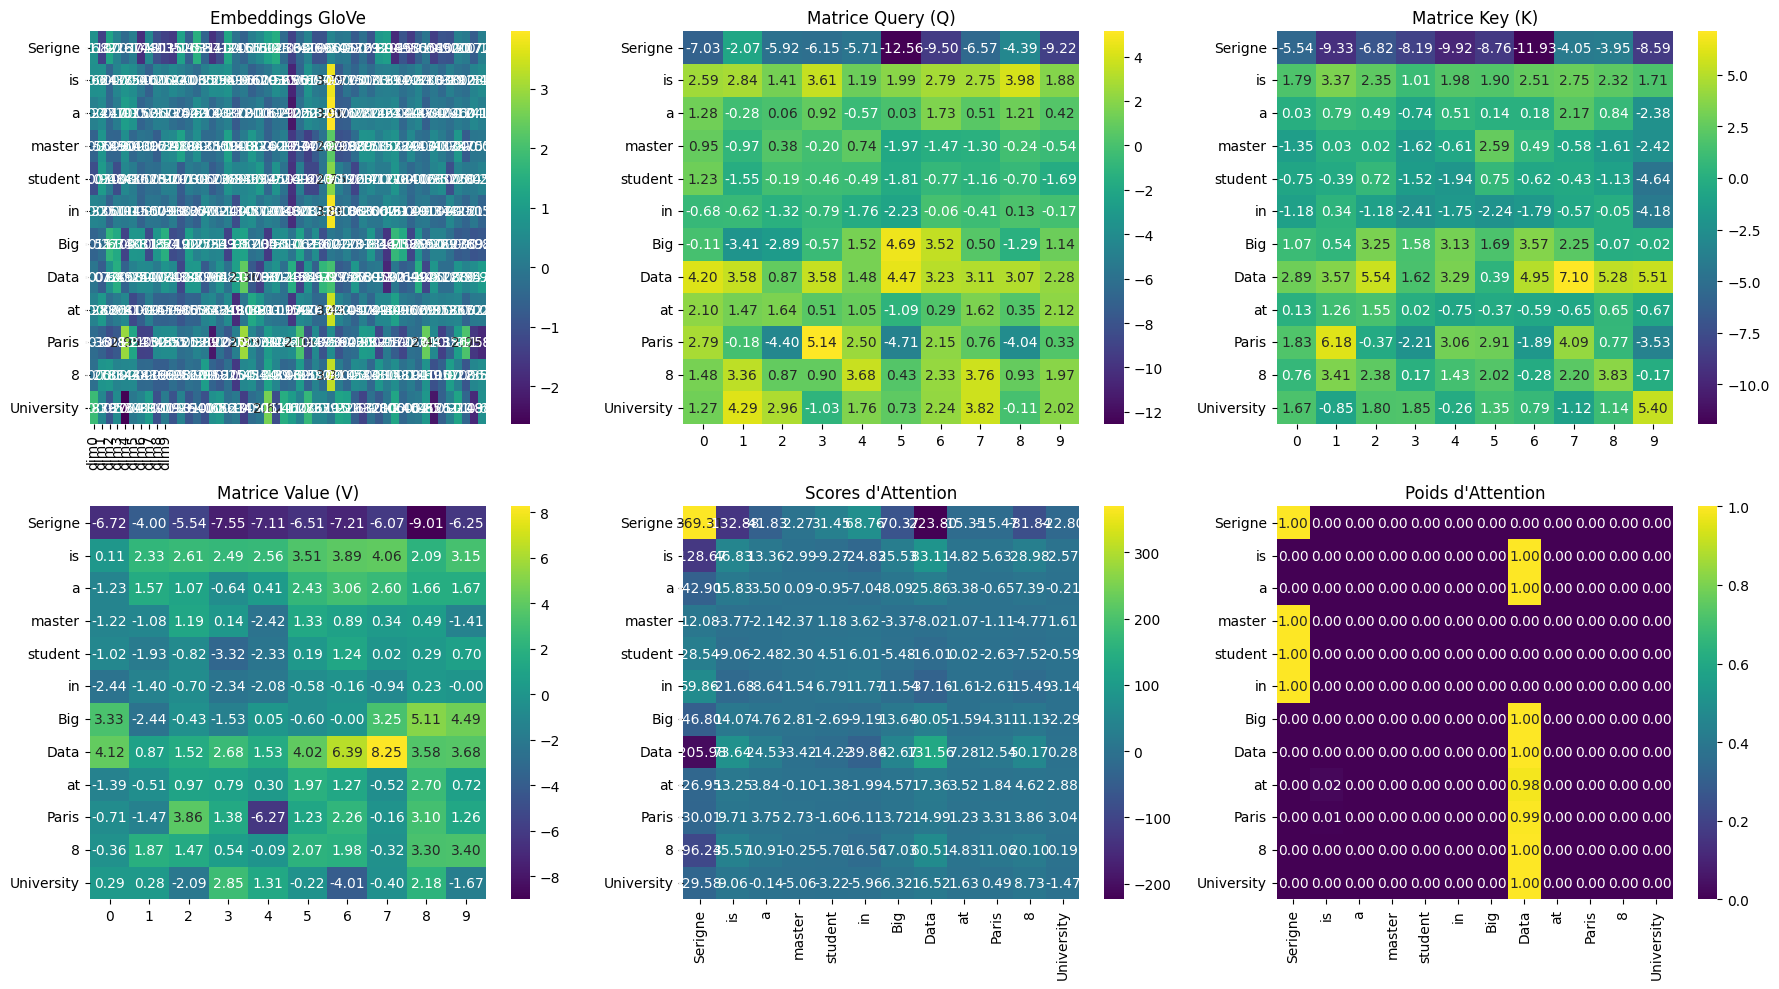


PARTIE 1: Embeddings GloVe
Phrase: ['Serigne', 'is', 'a', 'master', 'student', 'in', 'Big', 'Data', 'at', 'Paris', '8', 'University']

Embeddings GloVe (5 premières dimensions):
 [[ 0.68356932 -1.36595571  1.21194399  0.26125053 -0.36927714]
 [ 0.61849999  0.64253998 -0.46551999  0.3757      0.74838001]
 [ 0.21705     0.46515    -0.46757001  0.10082     1.01349998]
 [-0.56187999  0.78122997 -0.48791    -0.50342     0.59579998]
 [-1.07290006  0.94103003  0.084904   -1.07659996  0.42866001]
 [ 0.33041999  0.24995001 -0.60873997  0.10923     0.036372  ]
 [-0.54668008 -0.27165511  1.67345209  1.34046105 -1.29958124]
 [-0.06717829 -0.71575999  0.68205207  1.48724616 -0.58005324]
 [ 0.27724001  0.88468999 -0.26247001  0.084104    0.40812999]
 [-0.33130838 -0.61223673 -1.08515053 -0.82541053  2.94909443]
 [-0.25639999  0.78334999  0.85795999  0.33682001  0.43033001]
 [ 1.87096518  0.38961418 -0.86829273  0.53462909 -2.63574774]]

Poids d'Attention:
 [[1.00000000e+000 7.97024103e-219 2.766329

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import KeyedVectors
import gensim.downloader as api

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

def xavier_init(n_in, n_out):
    limit = np.sqrt(6 / (n_in + n_out))
    return np.random.uniform(-limit, limit, (n_in, n_out))

def get_positional_encoding(seq_len, d_model):
    PE = np.zeros((seq_len, d_model))
    for pos in range(seq_len):
        for i in range(0, d_model, 2):
            PE[pos, i] = np.sin(pos / (10000 ** (2*i/d_model)))
            if i+1 < d_model:
                PE[pos, i+1] = np.cos(pos / (10000 ** (2*i/d_model)))
    return PE

# PARTIE 1: Embeddings avec GloVe
print("Chargement du modèle GloVe ")
glove_model = api.load("glove-wiki-gigaword-50")

phrase = "Serigne is a master student in Big Data at Paris 8 University".split()
d_model = 50

embeddings_glove = np.array([glove_model[word] if word in glove_model else np.random.randn(d_model) for word in phrase])

np.random.seed(42)
Wq = np.random.rand(d_model, d_model)
Wk = np.random.rand(d_model, d_model)
Wv = np.random.rand(d_model, d_model)

Q = np.dot(embeddings_glove, Wq)
K = np.dot(embeddings_glove, Wk)
V = np.dot(embeddings_glove, Wv)

scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])
attention_weights = softmax(scores)
output = np.dot(attention_weights, V)

plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
sns.heatmap(embeddings_glove, annot=True, fmt='.2f', cmap='viridis', xticklabels=[f'dim{i}' for i in range(10)], yticklabels=phrase)
plt.title('Embeddings GloVe')

plt.subplot(2, 3, 2)
sns.heatmap(Q[:, :10], annot=True, fmt='.2f', cmap='viridis', yticklabels=phrase)
plt.title('Matrice Query (Q)')

plt.subplot(2, 3, 3)
sns.heatmap(K[:, :10], annot=True, fmt='.2f', cmap='viridis', yticklabels=phrase)
plt.title('Matrice Key (K)')

plt.subplot(2, 3, 4)
sns.heatmap(V[:, :10], annot=True, fmt='.2f', cmap='viridis', yticklabels=phrase)
plt.title('Matrice Value (V)')

plt.subplot(2, 3, 5)
sns.heatmap(scores, annot=True, fmt='.2f', cmap='viridis', xticklabels=phrase, yticklabels=phrase)
plt.title('Scores d\'Attention')

plt.subplot(2, 3, 6)
sns.heatmap(attention_weights, annot=True, fmt='.2f', cmap='viridis', xticklabels=phrase, yticklabels=phrase)
plt.title('Poids d\'Attention')

plt.tight_layout()
plt.show()

print("\nPARTIE 1: Embeddings GloVe")
print("Phrase:", phrase)
print("\nEmbeddings GloVe (5 premières dimensions):\n", embeddings_glove[:, :5])
print("\nPoids d'Attention:\n", attention_weights)


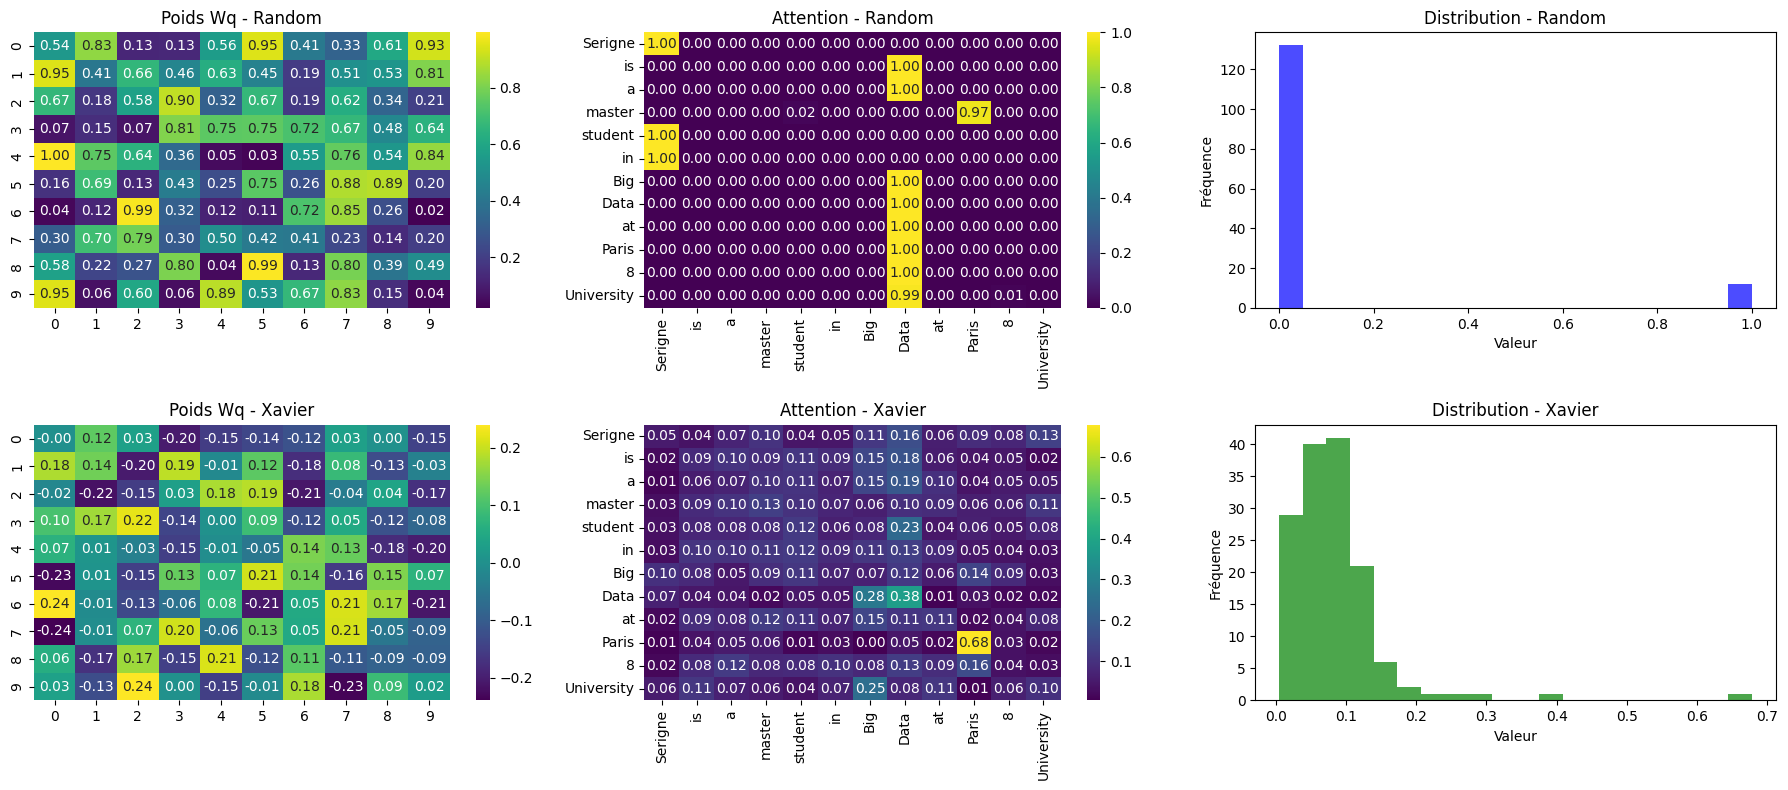


PARTIE 2: Comparaison Initialisations
Variance Random: 0.07587270003053945
Variance Xavier: 0.005182250618724972
Moyenne Random: 0.08333333333333333
Moyenne Xavier: 0.08333333333333333


In [19]:

# PARTIE 2: Comparaison Random vs Xavier
Wq_random = np.random.rand(d_model, d_model)
Wk_random = np.random.rand(d_model, d_model)
Wv_random = np.random.rand(d_model, d_model)

Wq_xavier = xavier_init(d_model, d_model)
Wk_xavier = xavier_init(d_model, d_model)
Wv_xavier = xavier_init(d_model, d_model)

Q_random = np.dot(embeddings_glove, Wq_random)
K_random = np.dot(embeddings_glove, Wk_random)
V_random = np.dot(embeddings_glove, Wv_random)

scores_random = np.dot(Q_random, K_random.T) / np.sqrt(K_random.shape[1])
weights_random = softmax(scores_random)

Q_xavier = np.dot(embeddings_glove, Wq_xavier)
K_xavier = np.dot(embeddings_glove, Wk_xavier)
V_xavier = np.dot(embeddings_glove, Wv_xavier)

scores_xavier = np.dot(Q_xavier, K_xavier.T) / np.sqrt(K_xavier.shape[1])
weights_xavier = softmax(scores_xavier)

plt.figure(figsize=(18, 8))

plt.subplot(2, 3, 1)
sns.heatmap(Wq_random[:10, :10], annot=True, fmt='.2f', cmap='viridis')
plt.title('Poids Wq - Random')

plt.subplot(2, 3, 2)
sns.heatmap(weights_random, annot=True, fmt='.2f', cmap='viridis', xticklabels=phrase, yticklabels=phrase)
plt.title('Attention - Random')

plt.subplot(2, 3, 3)
plt.hist(weights_random.flatten(), bins=20, alpha=0.7, color='blue')
plt.title('Distribution - Random')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')

plt.subplot(2, 3, 4)
sns.heatmap(Wq_xavier[:10, :10], annot=True, fmt='.2f', cmap='viridis')
plt.title('Poids Wq - Xavier')

plt.subplot(2, 3, 5)
sns.heatmap(weights_xavier, annot=True, fmt='.2f', cmap='viridis', xticklabels=phrase, yticklabels=phrase)
plt.title('Attention - Xavier')

plt.subplot(2, 3, 6)
plt.hist(weights_xavier.flatten(), bins=20, alpha=0.7, color='green')
plt.title('Distribution - Xavier')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

print("\nPARTIE 2: Comparaison Initialisations")
print("Variance Random:", np.var(weights_random))
print("Variance Xavier:", np.var(weights_xavier))
print("Moyenne Random:", np.mean(weights_random))
print("Moyenne Xavier:", np.mean(weights_xavier))


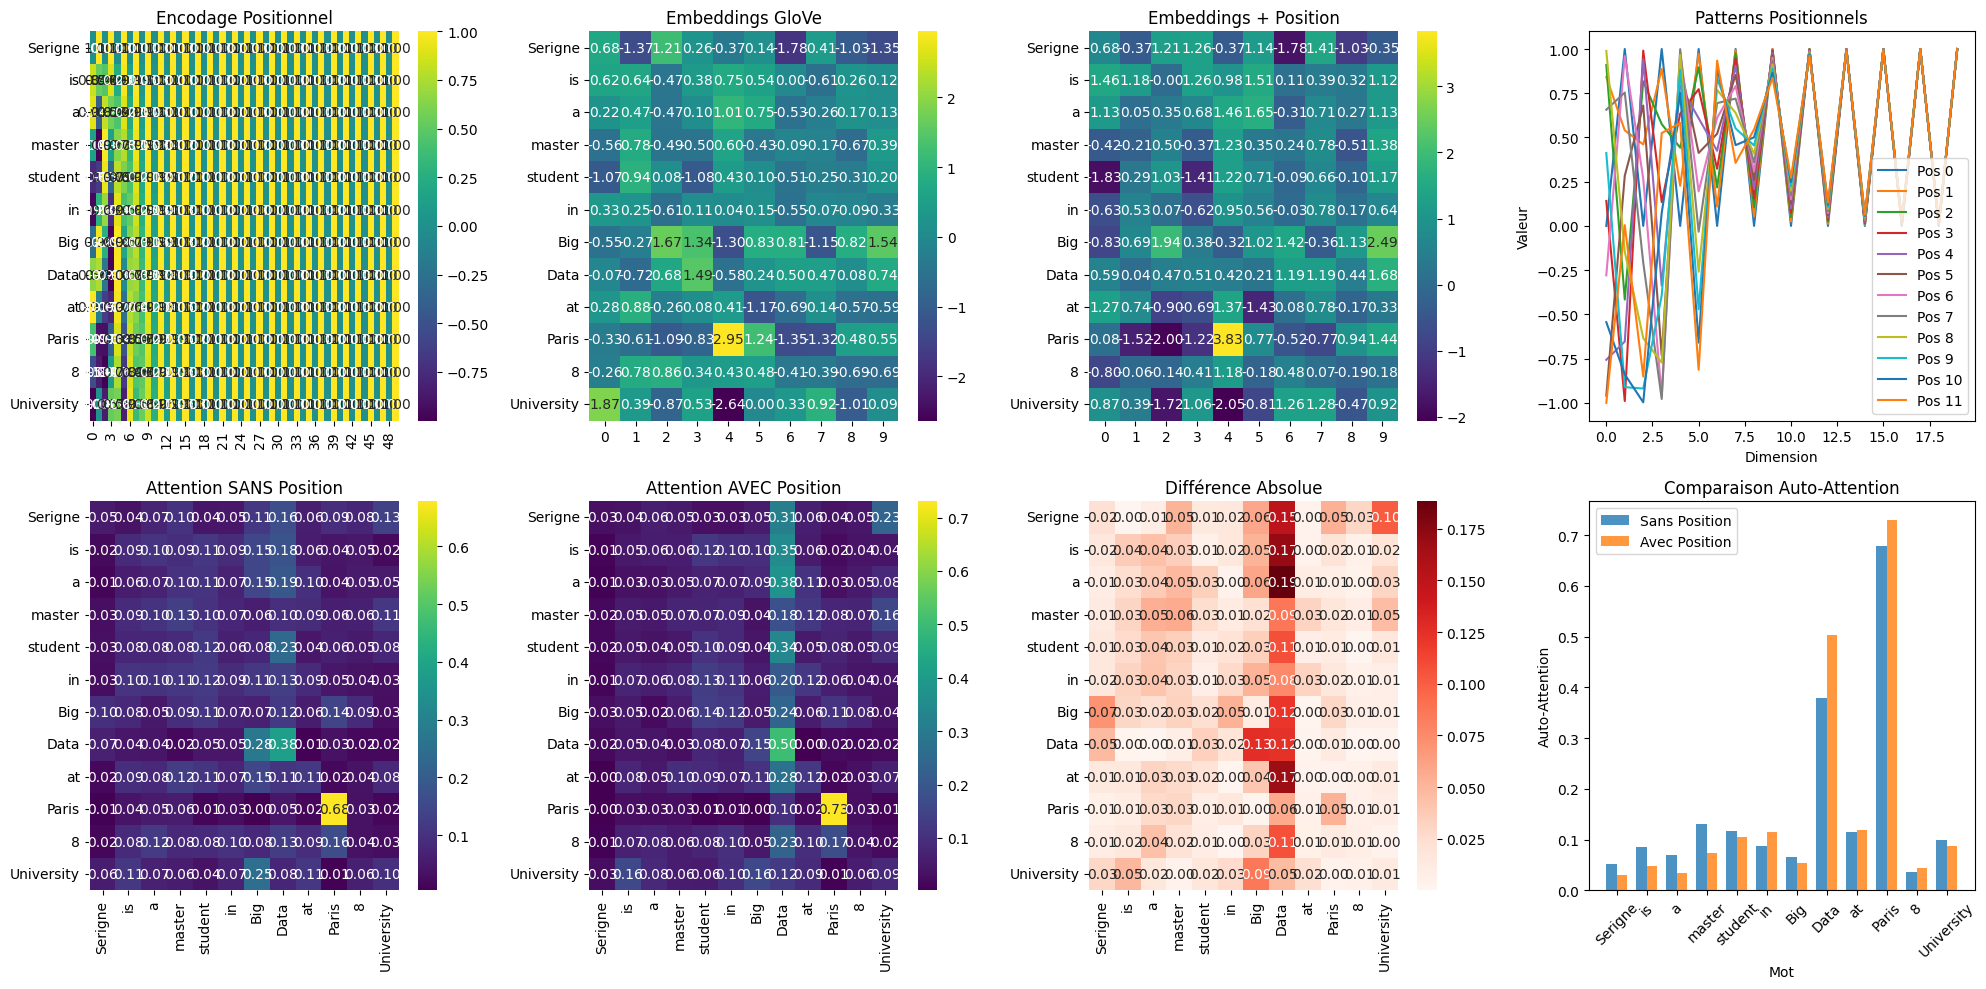


PARTIE 3: Encodage Positionnel
Phrase: ['Serigne', 'is', 'a', 'master', 'student', 'in', 'Big', 'Data', 'at', 'Paris', '8', 'University']

Encodage Positionnel (5 premières dimensions):
 [[ 0.          1.          0.          1.          0.        ]
 [ 0.84147098  0.54030231  0.46056364  0.88762669  0.22708824]
 [ 0.90929743 -0.41614684  0.81761716  0.57576226  0.44231075]
 [ 0.14112001 -0.9899925   0.99091397  0.13449722  0.63442181]
 [-0.7568025  -0.65364362  0.94150621 -0.33699563  0.79338329]
 [-0.95892427  0.28366219  0.6804981  -0.73274984  0.91088921]
 [-0.2794155   0.96017029  0.26655034 -0.963821    0.98079968]
 [ 0.6569866   0.75390225 -0.20730371 -0.97827663  0.99946177]
 [ 0.98935825 -0.14550003 -0.63456696 -0.77286789  0.96590035]
 [ 0.41211849 -0.91113026 -0.91921342 -0.3937597   0.88186907]
 [-0.54402111 -0.83907153 -0.99726976  0.07384466  0.7517587 ]
 [-0.99999021  0.0044257  -0.85119308  0.52485269  0.5823677 ]]

Poids d'Attention SANS position:
 [[0.05277348 0.03885

In [20]:
# PARTIE 3: Positional Encoding
positional_enc = get_positional_encoding(len(phrase), d_model)
embeddings_with_pos = embeddings_glove + positional_enc

Q_pos = np.dot(embeddings_with_pos, Wq_xavier)
K_pos = np.dot(embeddings_with_pos, Wk_xavier)
V_pos = np.dot(embeddings_with_pos, Wv_xavier)

scores_pos = np.dot(Q_pos, K_pos.T) / np.sqrt(K_pos.shape[1])
weights_pos = softmax(scores_pos)
output_pos = np.dot(weights_pos, V_pos)

plt.figure(figsize=(20, 10))

plt.subplot(2, 4, 1)
sns.heatmap(positional_enc, annot=True, fmt='.2f', cmap='viridis', yticklabels=phrase)
plt.title('Encodage Positionnel')

plt.subplot(2, 4, 2)
sns.heatmap(embeddings_glove[:, :10], annot=True, fmt='.2f', cmap='viridis', yticklabels=phrase)
plt.title('Embeddings GloVe')

plt.subplot(2, 4, 3)
sns.heatmap(embeddings_with_pos[:, :10], annot=True, fmt='.2f', cmap='viridis', yticklabels=phrase)
plt.title('Embeddings + Position')

plt.subplot(2, 4, 4)
for i in range(len(phrase)):
    plt.plot(positional_enc[i, :20], label=f'Pos {i}')
plt.title('Patterns Positionnels')
plt.xlabel('Dimension')
plt.ylabel('Valeur')
plt.legend()

plt.subplot(2, 4, 5)
sns.heatmap(weights_xavier, annot=True, fmt='.2f', cmap='viridis', xticklabels=phrase, yticklabels=phrase)
plt.title('Attention SANS Position')

plt.subplot(2, 4, 6)
sns.heatmap(weights_pos, annot=True, fmt='.2f', cmap='viridis', xticklabels=phrase, yticklabels=phrase)
plt.title('Attention AVEC Position')

plt.subplot(2, 4, 7)
diff = np.abs(weights_xavier - weights_pos)
sns.heatmap(diff, annot=True, fmt='.2f', cmap='Reds', xticklabels=phrase, yticklabels=phrase)
plt.title('Différence Absolue')

plt.subplot(2, 4, 8)
x = np.arange(len(phrase))
width = 0.35
plt.bar(x - width/2, np.diag(weights_xavier), width, label='Sans Position', alpha=0.8)
plt.bar(x + width/2, np.diag(weights_pos), width, label='Avec Position', alpha=0.8)
plt.xlabel('Mot')
plt.ylabel('Auto-Attention')
plt.title('Comparaison Auto-Attention')
plt.xticks(x, phrase, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

print("\nPARTIE 3: Encodage Positionnel")
print("Phrase:", phrase)
print("\nEncodage Positionnel (5 premières dimensions):\n", positional_enc[:, :5])
print("\nPoids d'Attention SANS position:\n", weights_xavier)
print("\nPoids d'Attention AVEC position:\n", weights_pos)
print("\nDifférence moyenne:", np.mean(np.abs(weights_xavier - weights_pos)))


## **Exercice 4:** Self-Attention mechanism: Varying Parameters

=== PARTIE 1: Variation de la Dimensionnalité des Embeddings ===


--- Dimension des embeddings: 4 ---
Shape Q: (7, 4), Shape attention_weights: (7, 7)
Moyenne poids d'attention: 0.1429

--- Dimension des embeddings: 8 ---
Shape Q: (7, 8), Shape attention_weights: (7, 7)
Moyenne poids d'attention: 0.1429

--- Dimension des embeddings: 16 ---
Shape Q: (7, 16), Shape attention_weights: (7, 7)
Moyenne poids d'attention: 0.1429


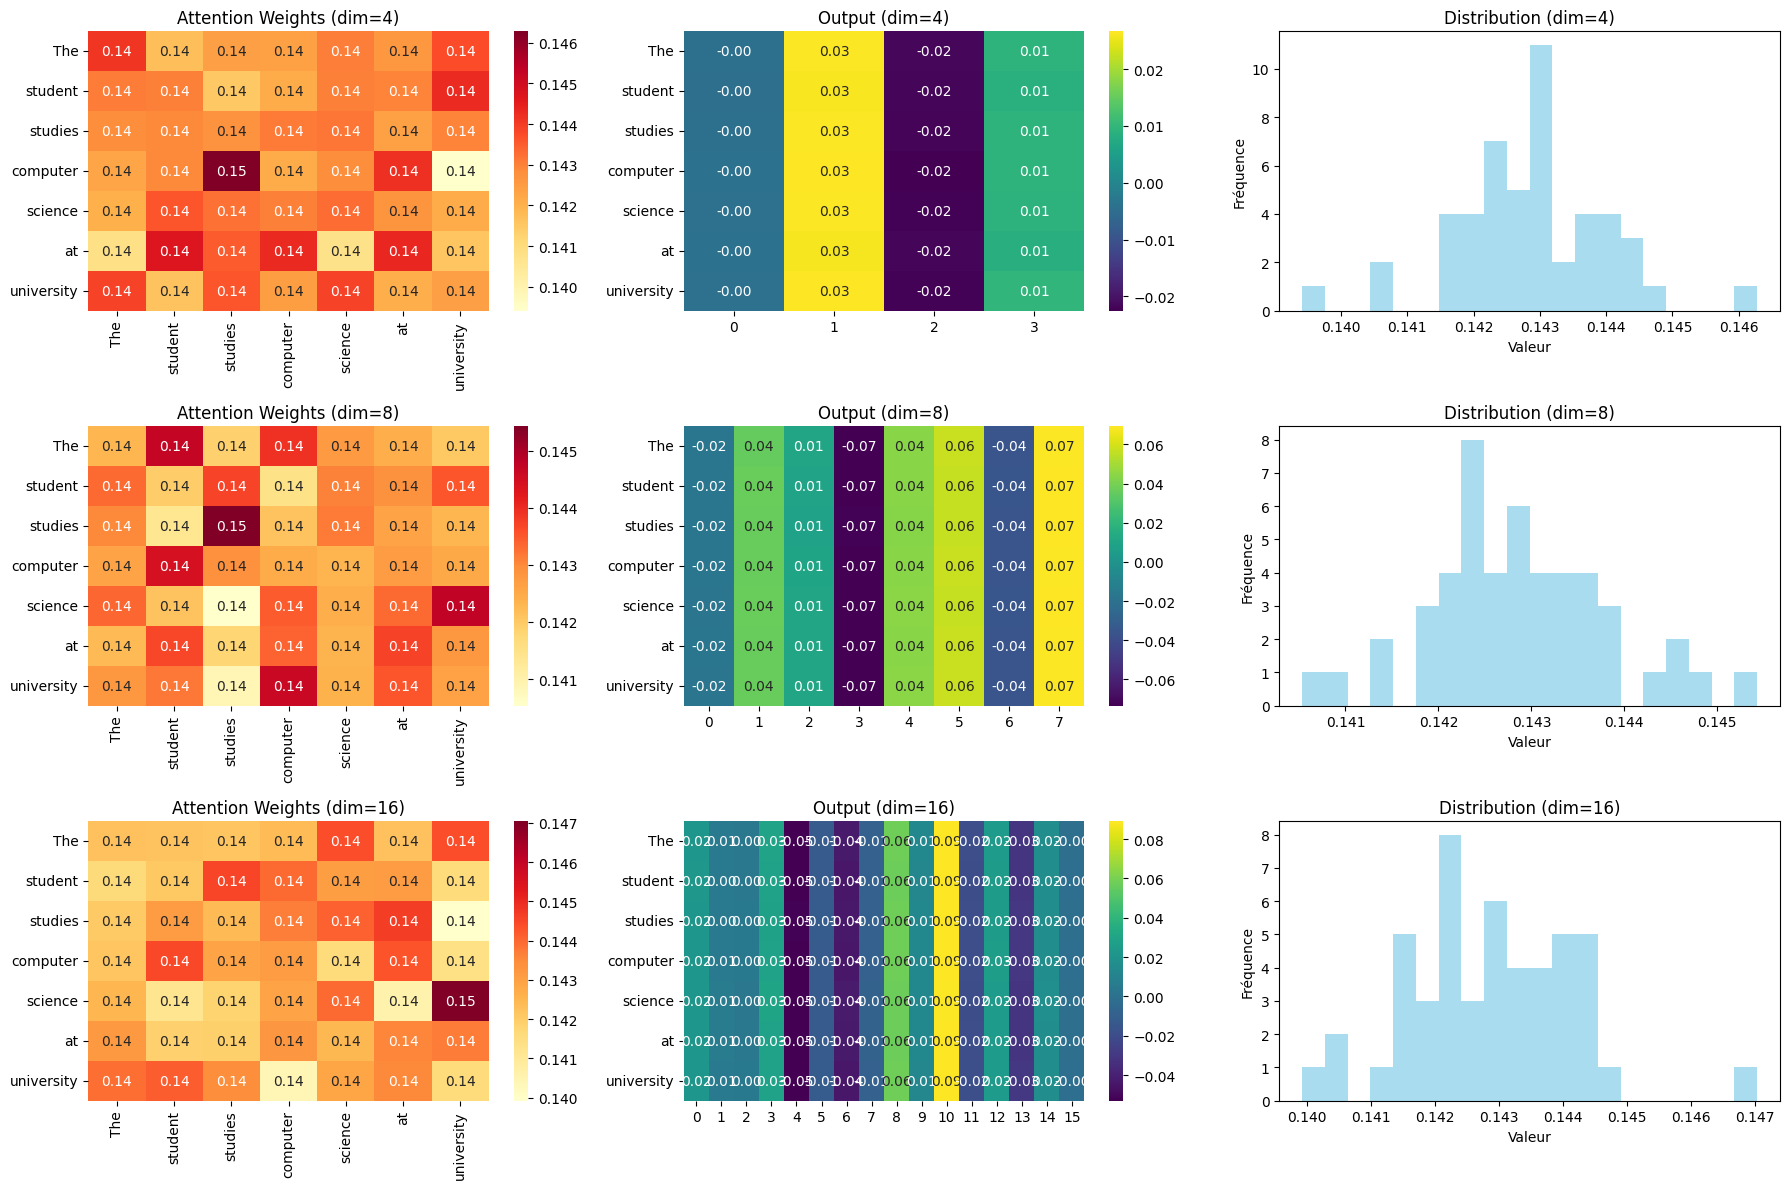

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def softmax(x):
    """Fonction softmax pour normaliser les scores d'attention"""
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

def layer_norm(x):
    """Normalisation de couche simplifiée"""
    return (x - np.mean(x, axis=-1, keepdims=True)) / np.std(x, axis=-1, keepdims=True)

def dropout(attention_weights, dropout_rate=0.1):
    """Applique du dropout aux poids d'attention"""
    mask = np.random.binomial(1, 1-dropout_rate, attention_weights.shape)
    return attention_weights * mask / (1 - dropout_rate)

def multi_head_attention(Q, K, V, num_heads, dropout_rate=0.0):
    """Implémentation de l'attention multi-têtes avec dropout optionnel"""
    d_model = Q.shape[-1]
    d_k = d_model // num_heads

    attention_outputs = []

    for _ in range(num_heads):
        # Projections linéaires pour chaque tête
        Wq_head = np.random.randn(d_model, d_k) * 0.1
        Wk_head = np.random.randn(d_model, d_k) * 0.1
        Wv_head = np.random.randn(d_model, d_k) * 0.1

        Q_head = np.dot(Q, Wq_head)
        K_head = np.dot(K, Wk_head)
        V_head = np.dot(V, Wv_head)

        # Calcul des scores d'attention
        scores = np.dot(Q_head, K_head.T) / np.sqrt(d_k)
        attention_weights = softmax(scores)

        # Application du dropout
        if dropout_rate > 0:
            attention_weights = dropout(attention_weights, dropout_rate)

        # Calcul de la sortie d'attention
        attention_output = np.dot(attention_weights, V_head)
        attention_outputs.append(attention_output)

    # Concaténation des têtes
    concatenated = np.concatenate(attention_outputs, axis=-1)

    # Projection finale
    Wo = np.random.randn(concatenated.shape[-1], d_model) * 0.1
    output = np.dot(concatenated, Wo)

    return output, attention_weights

# Phrase de test
sentence = "The student studies computer science at university".split()
vocab_size = len(sentence)

# PARTIE 1: VARIATION DE LA DIMENSIONNALITÉ DES EMBEDDINGS

print("=== PARTIE 1: Variation de la Dimensionnalité des Embeddings ===\n")

embedding_dims = [4, 8, 16]
results_part1 = {}

for dim in embedding_dims:
    print(f"\n--- Dimension des embeddings: {dim} ---")

    # Création des embeddings one-hot
    word_to_index = {word: idx for idx, word in enumerate(sentence)}
    embeddings = np.eye(vocab_size)
    inputs = np.array([embeddings[word_to_index[word]] for word in sentence])

    # Initialisation des poids
    np.random.seed(42)
    Wq = np.random.randn(vocab_size, dim) * 0.1
    Wk = np.random.randn(vocab_size, dim) * 0.1
    Wv = np.random.randn(vocab_size, dim) * 0.1

    # Calcul des matrices Q, K, V
    Q = np.dot(inputs, Wq)
    K = np.dot(inputs, Wk)
    V = np.dot(inputs, Wv)

    # Calcul de l'attention
    scores = np.dot(Q, K.T) / np.sqrt(dim)
    attention_weights = softmax(scores)
    output = np.dot(attention_weights, V)

    # Stockage des résultats
    results_part1[dim] = {
        'Q': Q, 'K': K, 'V': V,
        'attention_weights': attention_weights,
        'output': output
    }

    print(f"Shape Q: {Q.shape}, Shape attention_weights: {attention_weights.shape}")
    print(f"Moyenne poids d'attention: {attention_weights.mean():.4f}")

# Visualisation Partie 1
plt.figure(figsize=(18, 12))

for i, dim in enumerate(embedding_dims):
    # Attention weights
    plt.subplot(3, 3, i*3 + 1)
    sns.heatmap(results_part1[dim]['attention_weights'],
                annot=True, fmt='.2f', cmap='YlOrRd',
                xticklabels=sentence, yticklabels=sentence)
    plt.title(f'Attention Weights (dim={dim})')

    # Output
    plt.subplot(3, 3, i*3 + 2)
    sns.heatmap(results_part1[dim]['output'],
                annot=True, fmt='.2f', cmap='viridis',
                yticklabels=sentence)
    plt.title(f'Output (dim={dim})')

    # Distribution des poids d'attention
    plt.subplot(3, 3, i*3 + 3)
    plt.hist(results_part1[dim]['attention_weights'].flatten(),
             bins=20, alpha=0.7, color='skyblue')
    plt.title(f'Distribution (dim={dim})')
    plt.xlabel('Valeur')
    plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()



=== PARTIE 2: Attention Multi-Têtes ===


--- Nombre de têtes: 1 ---
Shape output: (7, 8)
Moyenne output: -0.0026

--- Nombre de têtes: 2 ---
Shape output: (7, 8)
Moyenne output: -0.0007

--- Nombre de têtes: 4 ---
Shape output: (7, 8)
Moyenne output: 0.0023


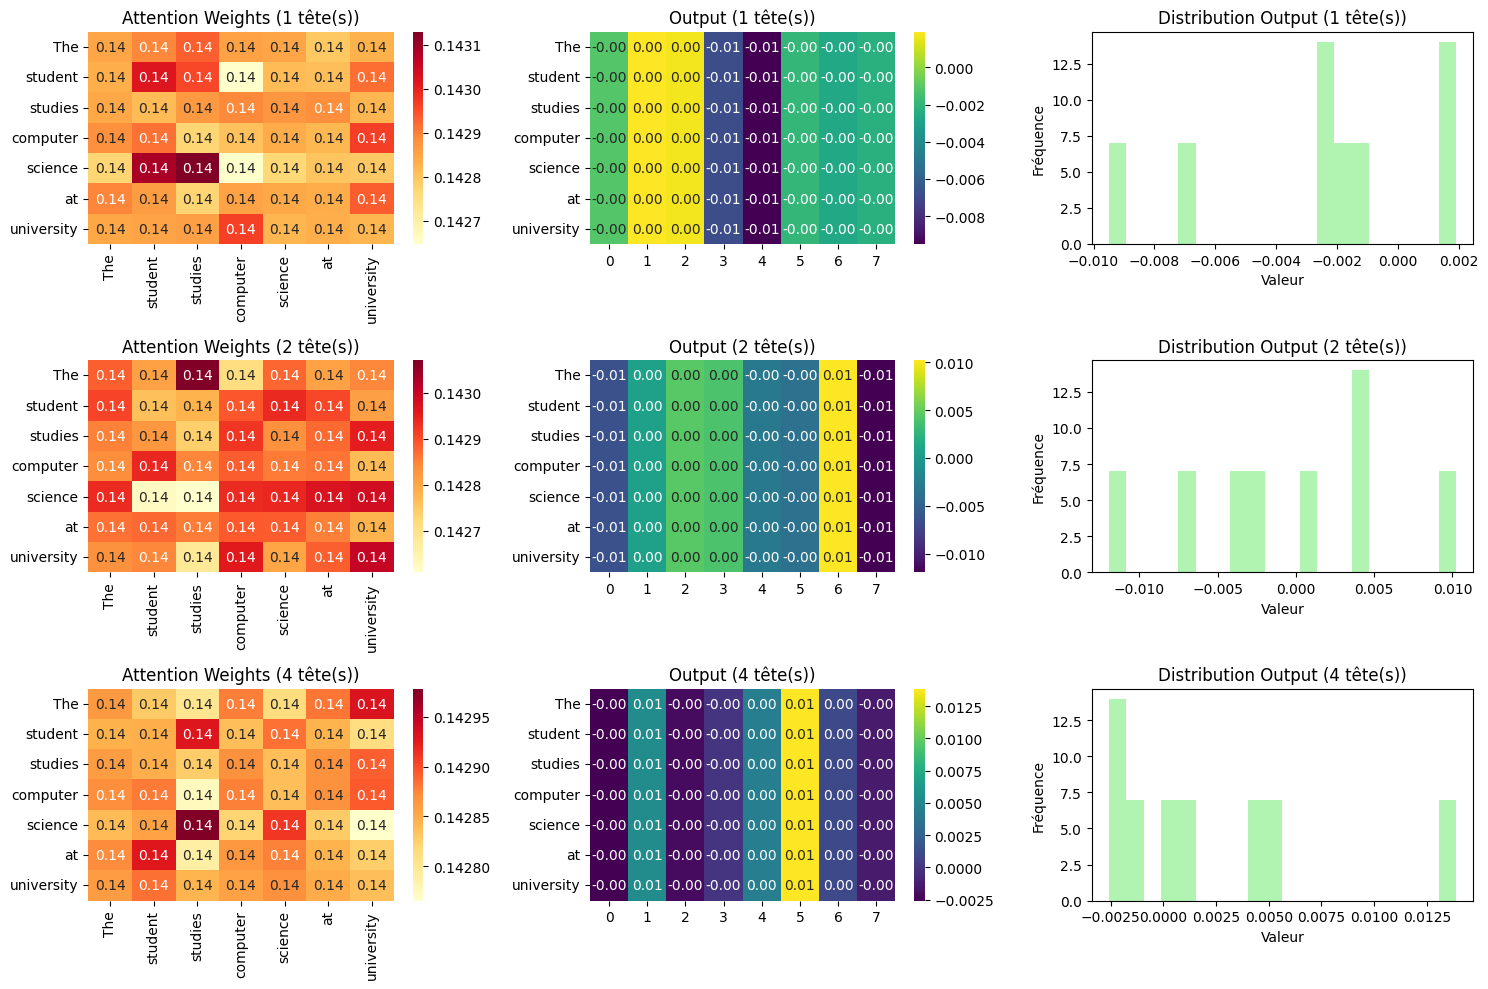

In [22]:
# PARTIE 2: ATTENTION MULTI-TÊTES

print("\n=== PARTIE 2: Attention Multi-Têtes ===\n")

# Préparation des inputs
embeddings = np.eye(vocab_size)
inputs = np.array([embeddings[word_to_index[word]] for word in sentence])
d_model = 8  # Dimension fixe pour la comparaison

# Initialisation des poids pour Q, K, V
np.random.seed(42)
Wq = np.random.randn(vocab_size, d_model) * 0.1
Wk = np.random.randn(vocab_size, d_model) * 0.1
Wv = np.random.randn(vocab_size, d_model) * 0.1

Q = np.dot(inputs, Wq)
K = np.dot(inputs, Wk)
V = np.dot(inputs, Wv)

num_heads_list = [1, 2, 4]
results_part2 = {}

for num_heads in num_heads_list:
    print(f"\n--- Nombre de têtes: {num_heads} ---")

    output, attention_weights = multi_head_attention(Q, K, V, num_heads)

    results_part2[num_heads] = {
        'attention_weights': attention_weights,
        'output': output
    }

    print(f"Shape output: {output.shape}")
    print(f"Moyenne output: {output.mean():.4f}")

# Visualisation Partie 2
plt.figure(figsize=(15, 10))

for i, num_heads in enumerate(num_heads_list):
    # Attention weights
    plt.subplot(3, 3, i*3 + 1)
    sns.heatmap(results_part2[num_heads]['attention_weights'],
                annot=True, fmt='.2f', cmap='YlOrRd',
                xticklabels=sentence, yticklabels=sentence)
    plt.title(f'Attention Weights ({num_heads} tête(s))')

    # Output
    plt.subplot(3, 3, i*3 + 2)
    sns.heatmap(results_part2[num_heads]['output'],
                annot=True, fmt='.2f', cmap='viridis',
                yticklabels=sentence)
    plt.title(f'Output ({num_heads} tête(s))')

    # Distribution des sorties
    plt.subplot(3, 3, i*3 + 3)
    plt.hist(results_part2[num_heads]['output'].flatten(),
             bins=20, alpha=0.7, color='lightgreen')
    plt.title(f'Distribution Output ({num_heads} tête(s))')
    plt.xlabel('Valeur')
    plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()


=== PARTIE 3: Dropout dans le Mécanisme d'Attention ===


--- Taux de dropout: 0.0 ---
Ratio de zéros dans les poids: 0.0%
Moyenne des poids non-nuls: 0.1429

--- Taux de dropout: 0.3 ---
Ratio de zéros dans les poids: 38.8%
Moyenne des poids non-nuls: 0.2041

--- Taux de dropout: 0.6 ---
Ratio de zéros dans les poids: 69.4%
Moyenne des poids non-nuls: 0.3571


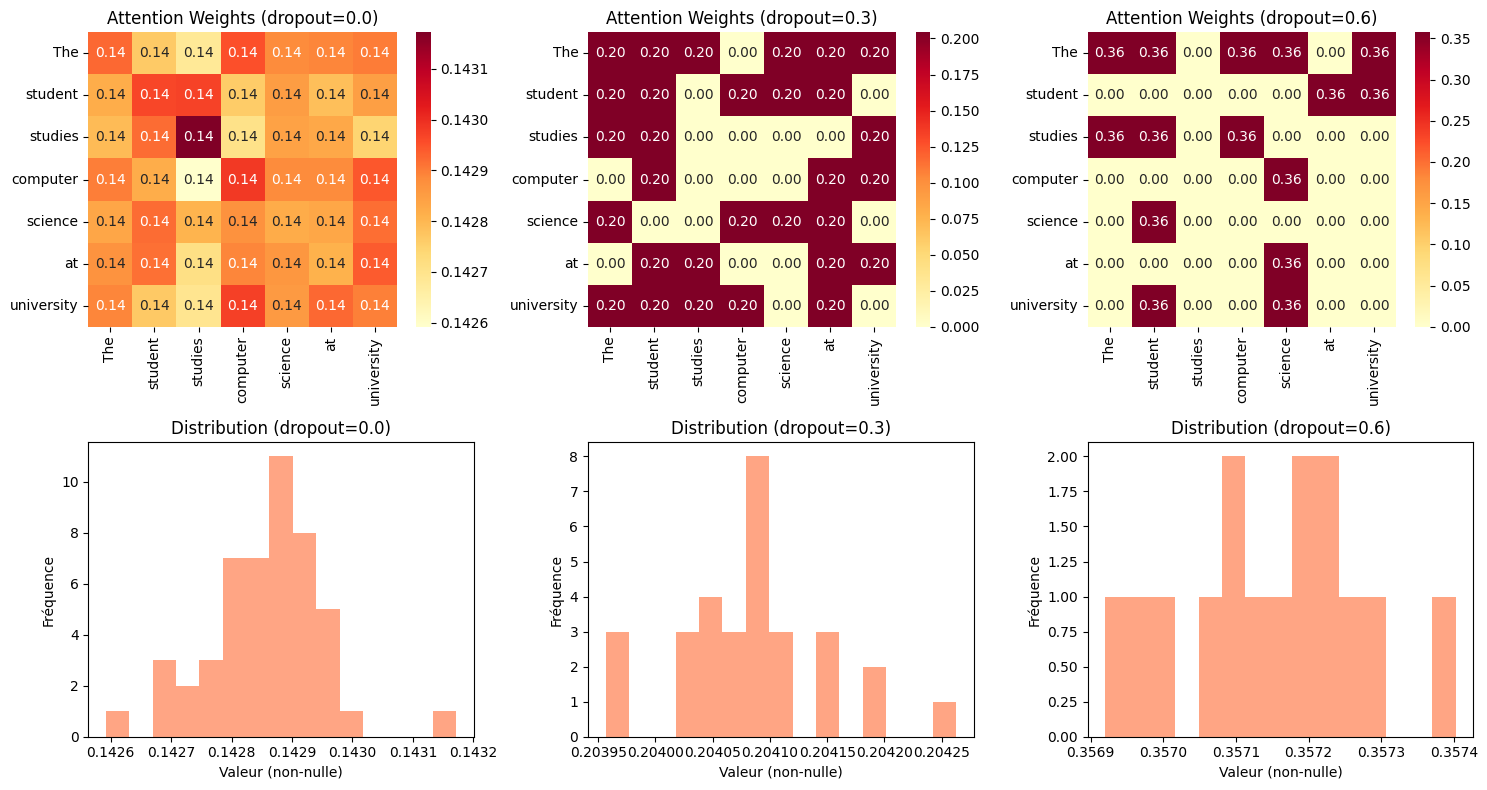


ANALYSE COMPARATIVE

1. IMPACT DE LA DIMENSION DES EMBEDDINGS:
   Dim 4: Moyenne=0.1429, Std=0.0011, Entropie=13.6212
   Dim 8: Moyenne=0.1429, Std=0.0010, Entropie=13.6212
   Dim 16: Moyenne=0.1429, Std=0.0013, Entropie=13.6211

2. IMPACT DU NOMBRE DE TÊTES:
   1 tête(s): Moyenne=-0.0026, Std=0.0037
   2 tête(s): Moyenne=-0.0007, Std=0.0065
   4 tête(s): Moyenne=0.0023, Std=0.0051

3. IMPACT DU DROPOUT:
   Dropout 0.0: Zéros=0.0%, Moyenne(non-zero)=0.1429
   Dropout 0.3: Zéros=38.8%, Moyenne(non-zero)=0.2041
   Dropout 0.6: Zéros=69.4%, Moyenne(non-zero)=0.3571

CONCLUSIONS

Dimensions plus petites → attention plus concentrée
Plus de têtes → diversité dans les patterns d'attention et Chaque tête capture différents types de relations
DROPOUT: Réduit le surapprentissage en forçant la redondance et Rend le modèle plus robuste et généralisable



In [23]:
# PARTIE 3: DROPOUT DANS L'ATTENTION

print("\n=== PARTIE 3: Dropout dans le Mécanisme d'Attention ===\n")

# Paramètres
dropout_rates = [0.0, 0.3, 0.6]
results_part3 = {}

for dropout_rate in dropout_rates:
    print(f"\n--- Taux de dropout: {dropout_rate} ---")

    # Calcul avec dropout
    output, attention_weights = multi_head_attention(Q, K, V, num_heads=2, dropout_rate=dropout_rate)

    results_part3[dropout_rate] = {
        'attention_weights': attention_weights,
        'output': output
    }

    # Calcul de statistiques
    weights = attention_weights.flatten()
    zero_ratio = np.sum(weights == 0) / len(weights) * 100

    print(f"Ratio de zéros dans les poids: {zero_ratio:.1f}%")
    print(f"Moyenne des poids non-nuls: {weights[weights != 0].mean():.4f}")

# Visualisation Partie 3
plt.figure(figsize=(15, 8))

for i, dropout_rate in enumerate(dropout_rates):
    # Attention weights avec dropout
    plt.subplot(2, 3, i + 1)
    sns.heatmap(results_part3[dropout_rate]['attention_weights'],
                annot=True, fmt='.2f', cmap='YlOrRd',
                xticklabels=sentence, yticklabels=sentence)
    plt.title(f'Attention Weights (dropout={dropout_rate})')

    # Distribution des poids d'attention
    plt.subplot(2, 3, i + 4)
    weights = results_part3[dropout_rate]['attention_weights'].flatten()
    plt.hist(weights[weights != 0], bins=15, alpha=0.7, color='coral')
    plt.title(f'Distribution (dropout={dropout_rate})')
    plt.xlabel('Valeur (non-nulle)')
    plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()
# ANALYSE COMPARATIVE

print("\n" + "="*30)
print("ANALYSE COMPARATIVE")

# Analyse Partie 1
print("\n1. IMPACT DE LA DIMENSION DES EMBEDDINGS:")
for dim in embedding_dims:
    weights = results_part1[dim]['attention_weights']
    print(f"   Dim {dim}: Moyenne={weights.mean():.4f}, Std={weights.std():.4f}, "
          f"Entropie={-np.sum(weights * np.log(weights + 1e-8)):.4f}")

# Analyse Partie 2
print("\n2. IMPACT DU NOMBRE DE TÊTES:")
for num_heads in num_heads_list:
    output = results_part2[num_heads]['output']
    print(f"   {num_heads} tête(s): Moyenne={output.mean():.4f}, "
          f"Std={output.std():.4f}")

# Analyse Partie 3
print("\n3. IMPACT DU DROPOUT:")
for dropout_rate in dropout_rates:
    weights = results_part3[dropout_rate]['attention_weights']
    non_zero_weights = weights[weights != 0]
    if len(non_zero_weights) > 0:
        print(f"   Dropout {dropout_rate}: Zéros={np.sum(weights == 0)/weights.size*100:.1f}%, "
              f"Moyenne(non-zero)={non_zero_weights.mean():.4f}")
    else:
        print(f"   Dropout {dropout_rate}: Tous les poids sont zéros")

# CONCLUSIONS

print("\n" + "="*30)
print("CONCLUSIONS")
print("""
Dimensions plus petites → attention plus concentrée
Plus de têtes → diversité dans les patterns d'attention et Chaque tête capture différents types de relations
DROPOUT: Réduit le surapprentissage en forçant la redondance et Rend le modèle plus robuste et généralisable
""")

## **Exercice 5:** Self-Attention mechanism: Advanced Techniques

=== PARTIE 1: Normalisation de Couche ===

--- Normalisation: before ---
  Output - Mean: -0.0001, Std: 0.0055
--- Normalisation: after ---
  Output - Mean: 0.0000, Std: 1.0000
--- Normalisation: none ---
  Output - Mean: -0.0035, Std: 0.0354


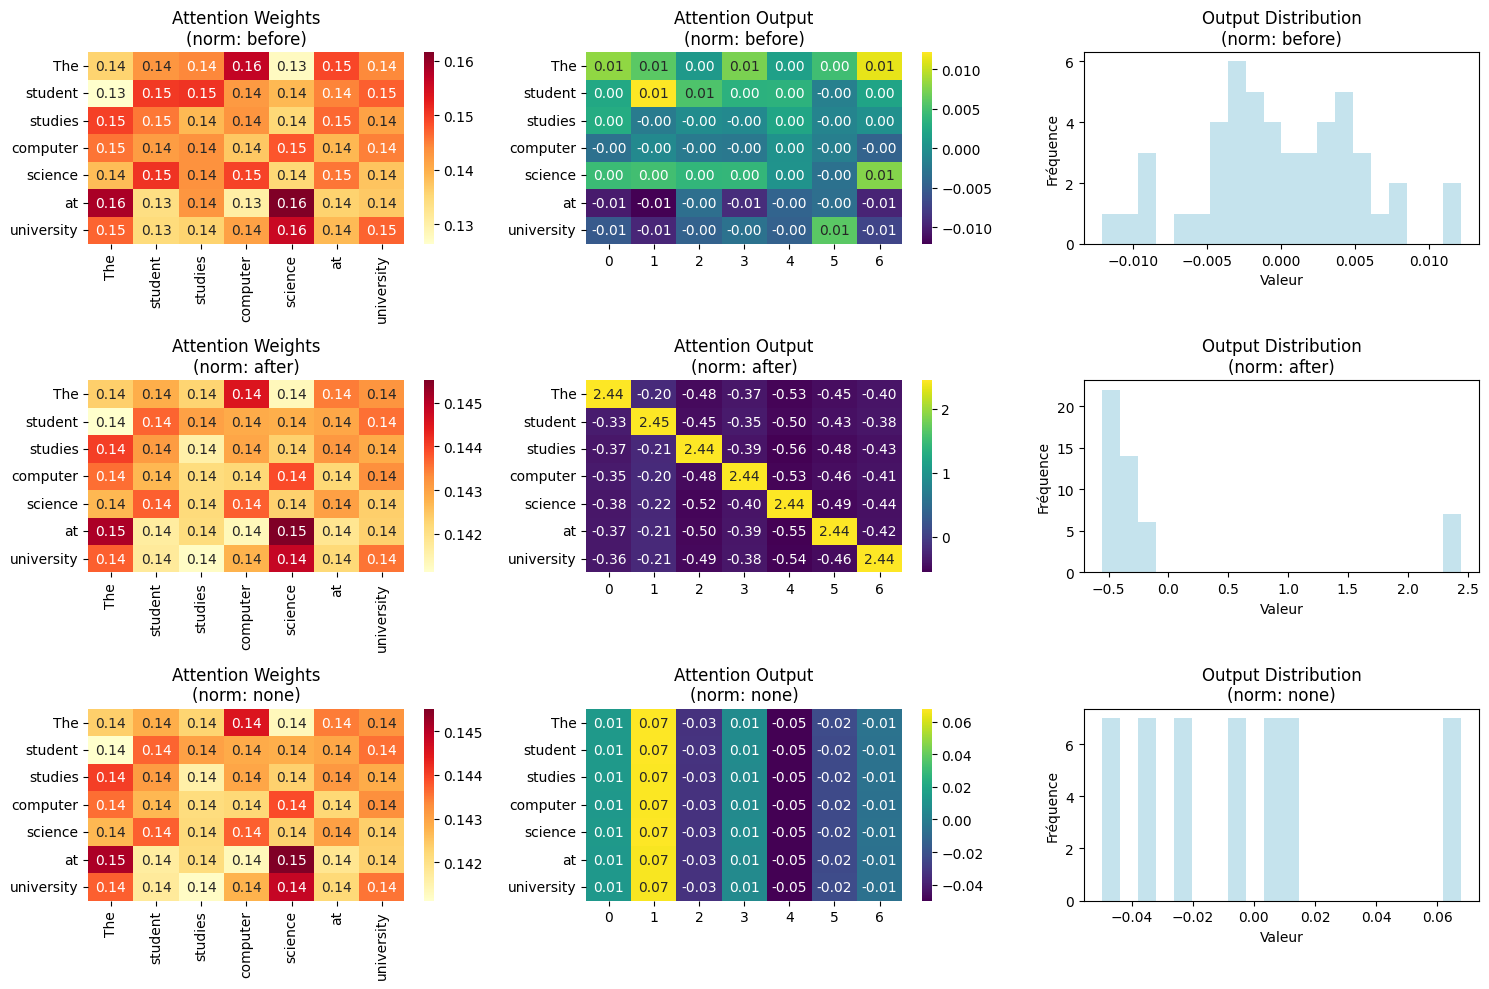

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

def softmax(x, mask=None):
    """Softmax avec support pour le masquage"""
    if mask is not None:
        x = x + mask
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

def layer_norm(x, eps=1e-6):
    """Normalisation de couche complète"""
    mean = np.mean(x, axis=-1, keepdims=True)
    std = np.std(x, axis=-1, keepdims=True)
    return (x - mean) / (std + eps)

def leaky_relu(x, alpha=0.01):
    """Fonction Leaky ReLU"""
    return np.where(x > 0, x, alpha * x)

def elu(x, alpha=1.0):
    """Fonction ELU (Exponential Linear Unit)"""
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def gelu(x):
    """Fonction GELU (Gaussian Error Linear Unit) - approximation"""
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)))

def create_padding_mask(sequences, pad_token=0):
    """Crée un masque de padding pour ignorer certains tokens"""
    mask = np.zeros_like(sequences[:, :, 0])  # Shape: (batch_size, seq_len)
    mask[sequences[:, :, 0] == pad_token] = -1e9
    return mask

# Phrases de test avec différentes longueurs
sentences = [
    "The student studies computer science".split(),
    "The professor teaches".split(),
    "The researcher publishes papers in journals".split()
]

# PARTIE 1: NORMALISATION DE COUCHE
print("=== PARTIE 1: Normalisation de Couche ===\n")

def attention_with_norm(inputs, Wq, Wk, Wv, norm_position='after'):
    """Mécanisme d'attention avec normalisation avant ou après"""

    if norm_position == 'before':
        # Normalisation AVANT l'attention
        inputs_norm = layer_norm(inputs)
        Q = np.dot(inputs_norm, Wq)
        K = np.dot(inputs_norm, Wk)
        V = np.dot(inputs_norm, Wv)
    else:
        # Pas de normalisation avant (ou après selon le cas)
        Q = np.dot(inputs, Wq)
        K = np.dot(inputs, Wk)
        V = np.dot(inputs, Wv)

    # Calcul de l'attention
    scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])
    attention_weights = softmax(scores)
    attention_output = np.dot(attention_weights, V)

    if norm_position == 'after':
        # Normalisation APRÈS l'attention
        attention_output = layer_norm(attention_output + inputs)

    return attention_weights, attention_output

# Préparation des données pour la partie 1
sentence = "The student studies computer science at university".split()
vocab_size = len(sentence)
word_to_index = {word: idx for idx, word in enumerate(sentence)}
embeddings = np.eye(vocab_size)
inputs = np.array([embeddings[word_to_index[word]] for word in sentence])

# Initialisation des poids
np.random.seed(42)
Wq = np.random.randn(vocab_size, vocab_size) * 0.1
Wk = np.random.randn(vocab_size, vocab_size) * 0.1
Wv = np.random.randn(vocab_size, vocab_size) * 0.1

# Calcul avec différentes positions de normalisation
norm_positions = ['before', 'after', 'none']
results_part1 = {}

for position in norm_positions:
    print(f"--- Normalisation: {position} ---")

    if position == 'none':
        # Sans normalisation
        Q = np.dot(inputs, Wq)
        K = np.dot(inputs, Wk)
        V = np.dot(inputs, Wv)
        scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])
        attention_weights = softmax(scores)
        attention_output = np.dot(attention_weights, V)
    else:
        attention_weights, attention_output = attention_with_norm(
            inputs, Wq, Wk, Wv, norm_position=position
        )

    results_part1[position] = {
        'attention_weights': attention_weights,
        'attention_output': attention_output
    }

    print(f"  Output - Mean: {attention_output.mean():.4f}, Std: {attention_output.std():.4f}")

# Visualisation Partie 1
plt.figure(figsize=(15, 10))

for i, position in enumerate(norm_positions):
    # Attention weights
    plt.subplot(3, 3, i*3 + 1)
    sns.heatmap(results_part1[position]['attention_weights'],
                annot=True, fmt='.2f', cmap='YlOrRd',
                xticklabels=sentence, yticklabels=sentence)
    plt.title(f'Attention Weights\n(norm: {position})')

    # Output
    plt.subplot(3, 3, i*3 + 2)
    sns.heatmap(results_part1[position]['attention_output'],
                annot=True, fmt='.2f', cmap='viridis',
                yticklabels=sentence)
    plt.title(f'Attention Output\n(norm: {position})')

    # Distribution des outputs
    plt.subplot(3, 3, i*3 + 3)
    plt.hist(results_part1[position]['attention_output'].flatten(),
             bins=20, alpha=0.7, color='lightblue')
    plt.title(f'Output Distribution\n(norm: {position})')
    plt.xlabel('Valeur')
    plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()



=== PARTIE 2: Fonctions d'Activation ===

--- Activation: relu ---
  Final Output - Mean: -0.0000, Std: 1.0000
--- Activation: leaky_relu ---
  Final Output - Mean: 0.0000, Std: 1.0000
--- Activation: elu ---
  Final Output - Mean: 0.0000, Std: 1.0000
--- Activation: gelu ---
  Final Output - Mean: 0.0000, Std: 1.0000


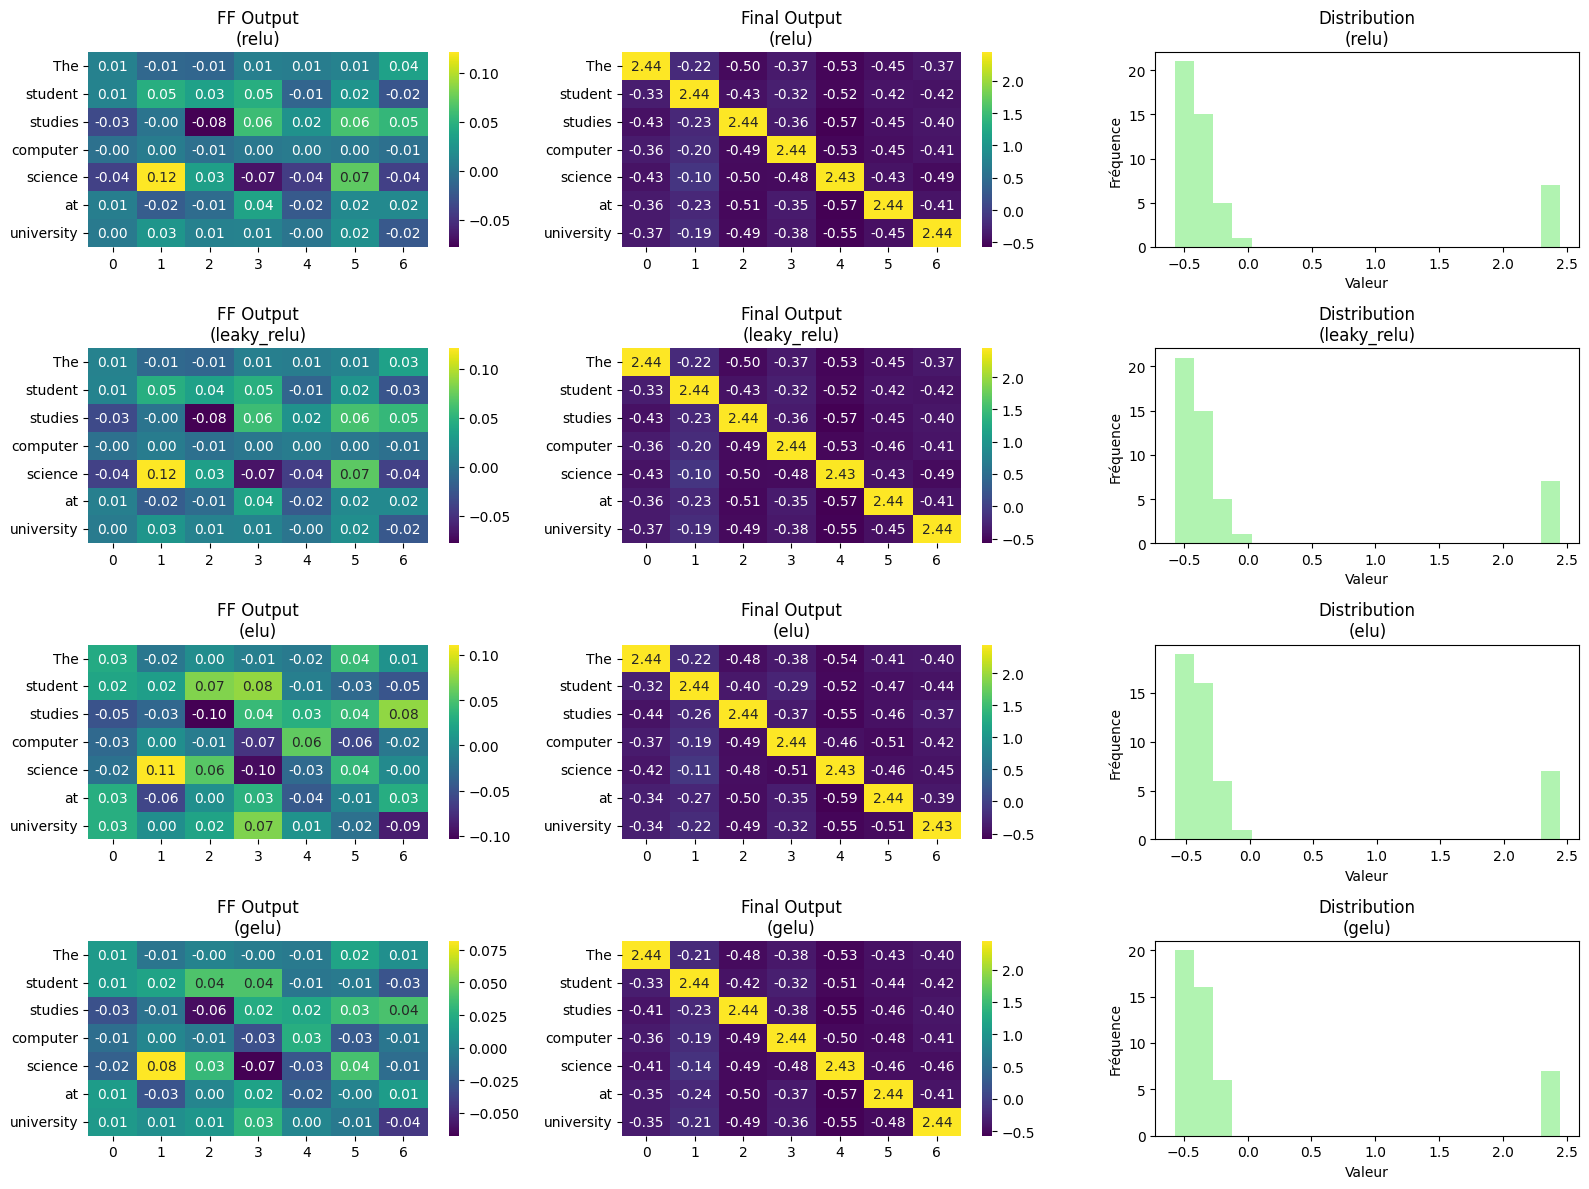

In [25]:
# PARTIE 2: FONCTIONS D'ACTIVATION
print("\n=== PARTIE 2: Fonctions d'Activation ===\n")

def feed_forward_with_activation(x, W1, W2, activation='relu'):
    """Couche feed-forward avec différentes fonctions d'activation"""

    # Première transformation linéaire
    hidden = np.dot(x, W1)

    # Application de la fonction d'activation
    if activation == 'relu':
        hidden = np.maximum(0, hidden)
    elif activation == 'leaky_relu':
        hidden = leaky_relu(hidden)
    elif activation == 'elu':
        hidden = elu(hidden)
    elif activation == 'gelu':
        hidden = gelu(hidden)
    else:
        raise ValueError(f"Activation non supportée: {activation}")

    # Deuxième transformation linéaire
    output = np.dot(hidden, W2)

    return output

# Initialisation des poids pour feed-forward
W1 = np.random.randn(vocab_size, vocab_size) * 0.1
W2 = np.random.randn(vocab_size, vocab_size) * 0.1

# Calcul de l'attention de base (sans feed-forward pour l'instant)
attention_weights, attention_output = attention_with_norm(inputs, Wq, Wk, Wv, 'after')

# Différentes fonctions d'activation
activations = ['relu', 'leaky_relu', 'elu', 'gelu']
results_part2 = {}

for activation in activations:
    print(f"--- Activation: {activation} ---")

    # Application du feed-forward avec l'activation spécifique
    ff_output = feed_forward_with_activation(attention_output, W1, W2, activation)

    # Add & Norm final
    final_output = layer_norm(ff_output + attention_output)

    results_part2[activation] = {
        'ff_output': ff_output,
        'final_output': final_output
    }

    print(f"  Final Output - Mean: {final_output.mean():.4f}, Std: {final_output.std():.4f}")

# Visualisation Partie 2
plt.figure(figsize=(16, 12))

for i, activation in enumerate(activations):
    # Output de la couche feed-forward
    plt.subplot(4, 3, i*3 + 1)
    sns.heatmap(results_part2[activation]['ff_output'],
                annot=True, fmt='.2f', cmap='viridis',
                yticklabels=sentence)
    plt.title(f'FF Output\n({activation})')

    # Output final
    plt.subplot(4, 3, i*3 + 2)
    sns.heatmap(results_part2[activation]['final_output'],
                annot=True, fmt='.2f', cmap='viridis',
                yticklabels=sentence)
    plt.title(f'Final Output\n({activation})')

    # Distribution des outputs finaux
    plt.subplot(4, 3, i*3 + 3)
    plt.hist(results_part2[activation]['final_output'].flatten(),
             bins=20, alpha=0.7, color='lightgreen')
    plt.title(f'Distribution\n({activation})')
    plt.xlabel('Valeur')
    plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()



=== PARTIE 3: Masquage pour Séquences de Longueur Variable ===

Séquences originales:
  'The student studies' -> Longueur: 3
  'The professor teaches data' -> Longueur: 4
  'The researcher writes papers' -> Longueur: 4

Masque d'attention (forme: (3, 4, 4)):
  Séquence 0:
  [[ 0.e+00  0.e+00  0.e+00 -1.e+09]
 [ 0.e+00  0.e+00  0.e+00 -1.e+09]
 [ 0.e+00  0.e+00  0.e+00 -1.e+09]
 [-1.e+09 -1.e+09 -1.e+09 -1.e+09]]
  Séquence 1:
  [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
  Séquence 2:
  [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


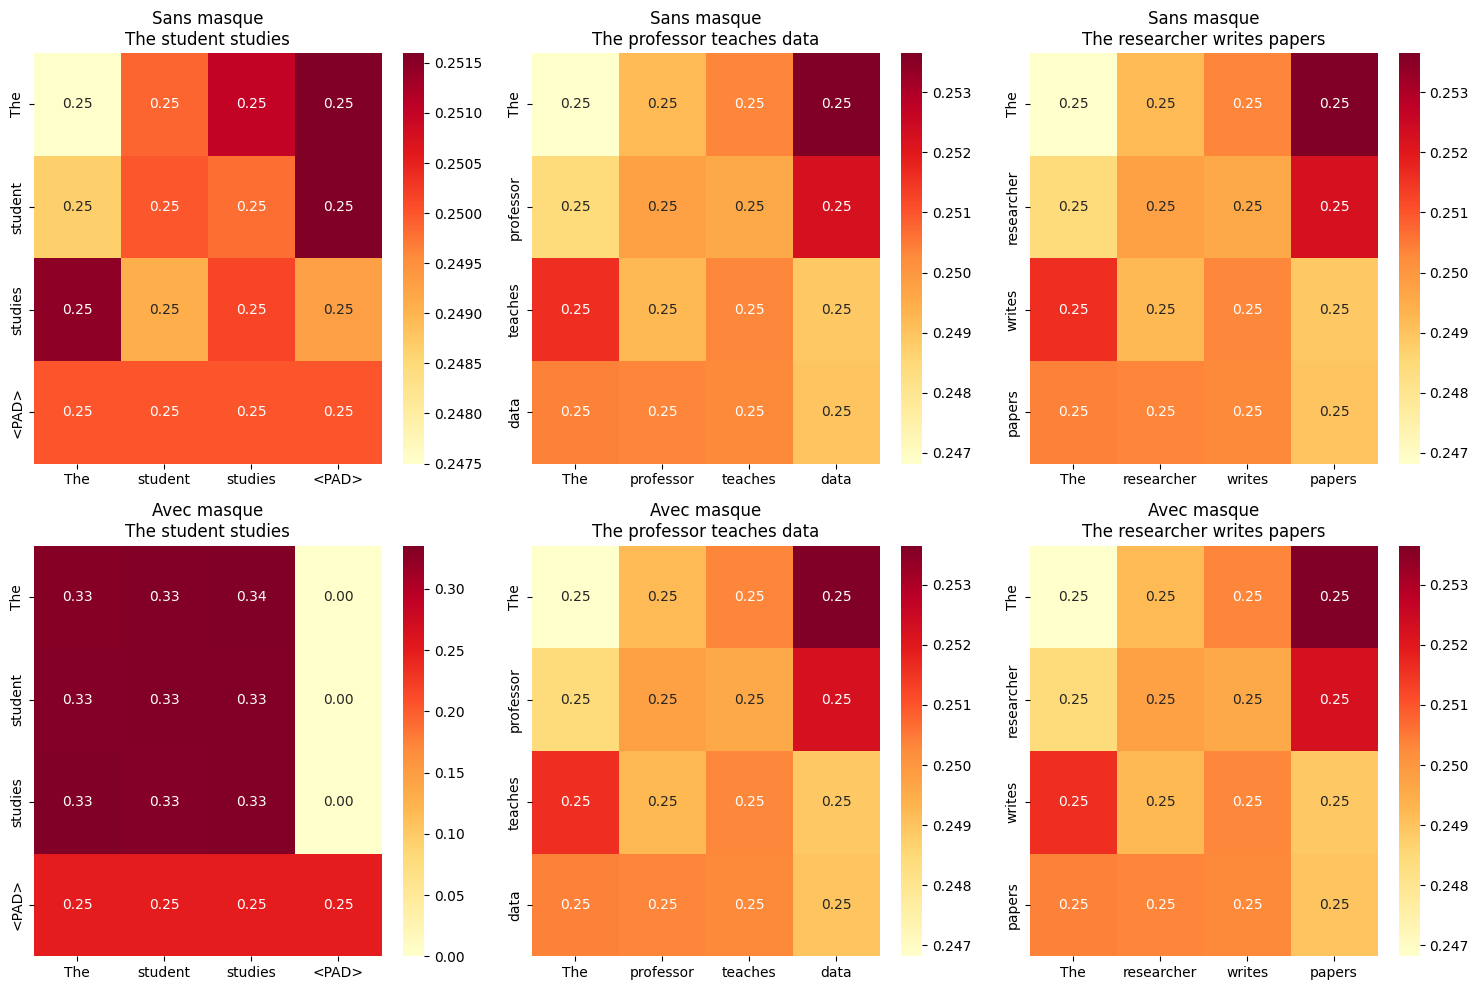


ANALYSE COMPARATIVE

Séquence: The student studies
  Positions de padding: [3]
  Position 3 (padding):
    Sans masque - attention vers: 1.0025, depuis: 1.0000
    Avec masque  - attention vers: 0.2500, depuis: 1.0000

Séquence: The professor teaches data
  Positions de padding: []

Séquence: The researcher writes papers
  Positions de padding: []

IMPACT DU MASQUAGE
Attention moyenne vers les tokens de padding:
  Sans masque: 1.002487
  Avec masque:  0.250000
  Réduction:    75.1%


In [26]:

# PARTIE 3: MASQUAGE POUR SÉQUENCES DE LONGUEUR VARIABLE

print("\n=== PARTIE 3: Masquage pour Séquences de Longueur Variable ===\n")

def create_attention_mask(sequence_lengths, max_length):
    """Crée un masque d'attention pour ignorer les tokens de padding"""
    mask = np.zeros((len(sequence_lengths), max_length, max_length))
    for i, length in enumerate(sequence_lengths):
        # Masquer les positions après la longueur réelle
        mask[i, :, length:] = -1e9
        mask[i, length:, :] = -1e9
    return mask

def attention_with_masking(Q, K, V, mask=None):
    """Mécanisme d'attention avec support pour le masquage"""

    # Calcul des scores d'attention
    scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])

    # Application du masque si fourni
    if mask is not None:
        scores = scores + mask

    # Softmax
    attention_weights = softmax(scores)

    # Calcul de la sortie
    attention_output = np.dot(attention_weights, V)

    return attention_weights, attention_output

# Préparation des données
sentences = [
    "The student studies  ".split(),           # Longueur 3
    "The professor teaches data".split(),    # Longueur 4
    "The researcher writes papers".split()   # Longueur 4
]

# Calcul des longueurs
sequence_lengths = [len(sent) for sent in sentences]
max_length = max(sequence_lengths)
vocab_size = max_length  # Pour simplifier, on utilise la même taille

print("Séquences originales:")
for i, sent in enumerate(sentences):
    print(f"  '{' '.join(sent)}' -> Longueur: {sequence_lengths[i]}")

# Création des embeddings one-hot padonnés
padded_embeddings = []
for sent in sentences:
    # Créer le vocabulaire pour cette phrase
    word_to_index = {word: idx for idx, word in enumerate(sent)}
    embeddings = np.eye(len(sent))
    sequence = np.array([embeddings[word_to_index[word]] for word in sent])

    # Padding pour atteindre la longueur maximale
    padded = np.zeros((max_length, max_length))
    padded[:len(sent), :len(sent)] = sequence
    padded_embeddings.append(padded)

padded_embeddings = np.array(padded_embeddings)

# Création du masque d'attention
attention_mask = create_attention_mask(sequence_lengths, max_length)

print(f"\nMasque d'attention (forme: {attention_mask.shape}):")
for i, mask in enumerate(attention_mask):
    print(f"  Séquence {i}:")
    print(f"  {mask}")

# Initialisation des poids (communs à toutes les séquences)
np.random.seed(42)
Wq = np.random.randn(vocab_size, vocab_size) * 0.1
Wk = np.random.randn(vocab_size, vocab_size) * 0.1
Wv = np.random.randn(vocab_size, vocab_size) * 0.1

# Calcul avec et sans masquage
results_part3 = {'sans_masque': [], 'avec_masque': []}

for i, embeddings in enumerate(padded_embeddings):
    # Calcul des matrices Q, K, V
    Q = np.dot(embeddings, Wq)
    K = np.dot(embeddings, Wk)
    V = np.dot(embeddings, Wv)

    # SANS masque
    weights_no_mask, output_no_mask = attention_with_masking(Q, K, V)
    results_part3['sans_masque'].append({
        'attention_weights': weights_no_mask,
        'attention_output': output_no_mask,
        'sentence': sentences[i]
    })

    # AVEC masque
    mask = attention_mask[i] if i < len(attention_mask) else None
    weights_mask, output_mask = attention_with_masking(Q, K, V, mask)
    results_part3['avec_masque'].append({
        'attention_weights': weights_mask,
        'attention_output': output_mask,
        'sentence': sentences[i]
    })

# Visualisation Partie 3
plt.figure(figsize=(15, 10))

for j, mask_type in enumerate(['sans_masque', 'avec_masque']):
    for i, result in enumerate(results_part3[mask_type]):
        # Attention weights
        plt.subplot(2, 3, j*3 + i + 1)

        # Créer les labels avec indication du padding
        labels = result['sentence'] + ['<PAD>'] * (max_length - len(result['sentence']))

        sns.heatmap(result['attention_weights'],
                   annot=True, fmt='.2f', cmap='YlOrRd',
                   xticklabels=labels,
                   yticklabels=labels)

        title_type = "Sans masque" if mask_type == 'sans_masque' else "Avec masque"
        plt.title(f'{title_type}\n{" ".join(result["sentence"])}')

plt.tight_layout()
plt.show()

# Analyse comparative
print("\n" + "="*50)
print("ANALYSE COMPARATIVE")
print("="*50)

for i in range(len(sentences)):
    print(f"\nSéquence: {' '.join(sentences[i])}")

    weights_no_mask = results_part3['sans_masque'][i]['attention_weights']
    weights_mask = results_part3['avec_masque'][i]['attention_weights']

    # Calcul de l'attention sur les positions de padding
    real_length = len(sentences[i])
    padding_positions = list(range(real_length, max_length))

    print(f"  Positions de padding: {padding_positions}")

    for pos in padding_positions:
        attention_to_padding_no_mask = weights_no_mask[:, pos].sum()
        attention_from_padding_no_mask = weights_no_mask[pos, :].sum()

        attention_to_padding_mask = weights_mask[:, pos].sum()
        attention_from_padding_mask = weights_mask[pos, :].sum()

        print(f"  Position {pos} (padding):")
        print(f"    Sans masque - attention vers: {attention_to_padding_no_mask:.4f}, depuis: {attention_from_padding_no_mask:.4f}")
        print(f"    Avec masque  - attention vers: {attention_to_padding_mask:.4f}, depuis: {attention_from_padding_mask:.4f}")

# Résumé de l'impact
print("\n" + "="*50)
print("IMPACT DU MASQUAGE")
print("="*50)

total_attention_to_padding_no_mask = 0
total_attention_to_padding_mask = 0
count = 0

for i in range(len(sentences)):
    real_length = len(sentences[i])
    padding_positions = list(range(real_length, max_length))

    weights_no_mask = results_part3['sans_masque'][i]['attention_weights']
    weights_mask = results_part3['avec_masque'][i]['attention_weights']

    for pos in padding_positions:
        total_attention_to_padding_no_mask += weights_no_mask[:, pos].sum()
        total_attention_to_padding_mask += weights_mask[:, pos].sum()
        count += 1

if count > 0:
    avg_no_mask = total_attention_to_padding_no_mask / count
    avg_mask = total_attention_to_padding_mask / count

    print(f"Attention moyenne vers les tokens de padding:")
    print(f"  Sans masque: {avg_no_mask:.6f}")
    print(f"  Avec masque:  {avg_mask:.6f}")
    print(f"  Réduction:    {(1 - avg_mask/avg_no_mask)*100:.1f}%")


##**Exercice 6:** Self-Attention mechanism: Applications

=== PARTIE 1: Entités Nommées ===

Phrase: Barack Obama was the 44th president of the United States
Entités nommées identifiées: 'Barack Obama', 'United States', '44th'



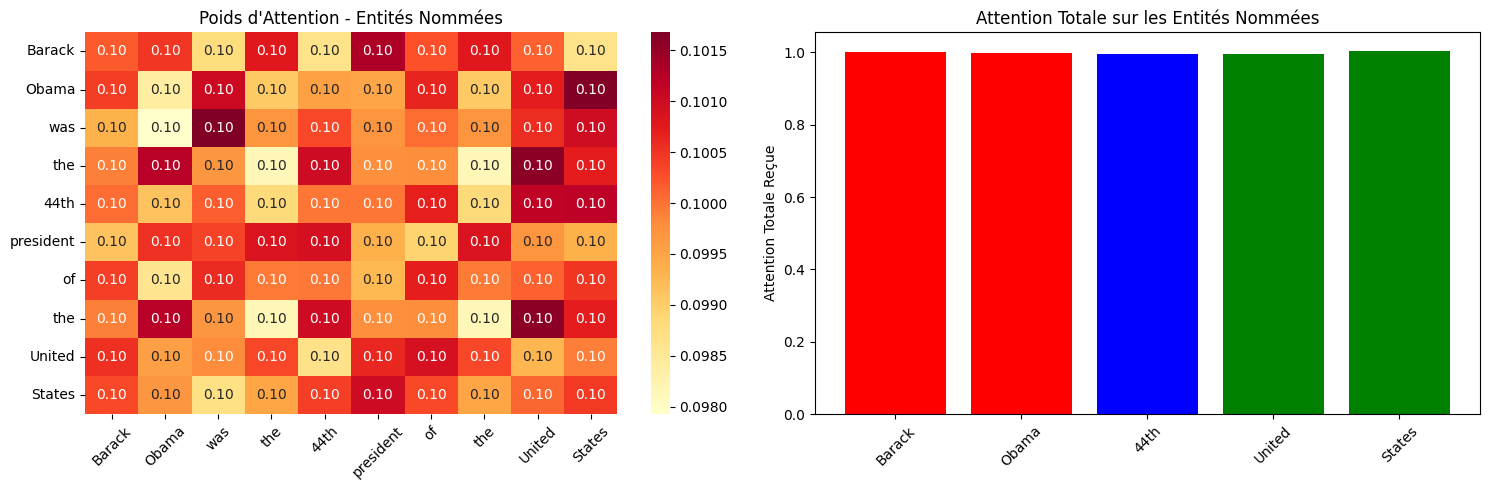

ANALYSE DES ENTITÉS NOMMÉES:

1. Attention sur 'Barack Obama':
   'Barack' → Obama: 0.100, Barack: 0.100
   'Obama' → Obama: 0.098, Barack: 0.100
   'the' → Obama: 0.101, Barack: 0.100
   '44th' → Obama: 0.099, Barack: 0.100
   'president' → Obama: 0.101, Barack: 0.099
   'of' → Obama: 0.099, Barack: 0.100
   'the' → Obama: 0.101, Barack: 0.100
   'United' → Obama: 0.100, Barack: 0.101
   'States' → Obama: 0.100, Barack: 0.100

2. Attention sur 'United States':
   'Barack' → United: 0.101, States: 0.100
   'Obama' → United: 0.099, States: 0.101
   'was' → United: 0.100, States: 0.101
   'the' → United: 0.098, States: 0.102
   '44th' → United: 0.099, States: 0.101
   'president' → United: 0.101, States: 0.100
   'of' → United: 0.100, States: 0.100
   'the' → United: 0.098, States: 0.102
   'United' → United: 0.100, States: 0.099
   'States' → United: 0.100, States: 0.100

3. Auto-attention des entités:
   'Barack' s'auto-attentionne: 0.100
   'Obama' s'auto-attentionne: 0.098
   'United

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

def layer_norm(x, eps=1e-6):
    mean = np.mean(x, axis=-1, keepdims=True)
    std = np.std(x, axis=-1, keepdims=True)
    return (x - mean) / (std + eps)

def self_attention(inputs, Wq, Wk, Wv):
    """Mécanisme d'auto-attention de base"""
    Q = np.dot(inputs, Wq)
    K = np.dot(inputs, Wk)
    V = np.dot(inputs, Wv)

    scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])
    attention_weights = softmax(scores)
    output = np.dot(attention_weights, V)

    return attention_weights, output

# PARTIE 1: ENTITÉS NOMMÉES

print("=== PARTIE 1: Entités Nommées ===\n")

# Phrase avec entités nommées
named_entity_sentence = "Barack Obama was the 44th president of the United States".split()
vocab_size = len(named_entity_sentence)

print(f"Phrase: {' '.join(named_entity_sentence)}")
print(f"Entités nommées identifiées: 'Barack Obama', 'United States', '44th'\n")

# Création des embeddings one-hot
word_to_index = {word: idx for idx, word in enumerate(named_entity_sentence)}
embeddings = np.eye(vocab_size)
inputs = np.array([embeddings[word_to_index[word]] for word in named_entity_sentence])

# Initialisation des poids
np.random.seed(42)
Wq = np.random.randn(vocab_size, vocab_size) * 0.1
Wk = np.random.randn(vocab_size, vocab_size) * 0.1
Wv = np.random.randn(vocab_size, vocab_size) * 0.1

# Calcul de l'attention
attention_weights, attention_output = self_attention(inputs, Wq, Wk, Wv)

# Visualisation
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.heatmap(attention_weights, annot=True, fmt='.2f', cmap='YlOrRd',
            xticklabels=named_entity_sentence, yticklabels=named_entity_sentence)
plt.title('Poids d\'Attention - Entités Nommées')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Analyser l'attention sur les entités nommées
entity_positions = {
    'Barack': 0, 'Obama': 1, '44th': 3, 'United': 7, 'States': 8
}

plt.subplot(1, 2, 2)
entities = ['Barack', 'Obama', '44th', 'United', 'States']
attention_on_entities = []

for entity in entities:
    pos = entity_positions[entity]
    # Attention reçue par cette entité (combien les autres mots lui portent attention)
    attention_received = attention_weights[:, pos].sum()
    attention_on_entities.append(attention_received)

plt.bar(entities, attention_on_entities, color=['red', 'red', 'blue', 'green', 'green'])
plt.title('Attention Totale sur les Entités Nommées')
plt.xticks(rotation=45)
plt.ylabel('Attention Totale Reçue')

plt.tight_layout()
plt.show()

# Analyse
print("ANALYSE DES ENTITÉS NOMMÉES:")
print("=" * 50)

# Vérifier l'attention autour des entités nommées
print("\n1. Attention sur 'Barack Obama':")
for i, word in enumerate(named_entity_sentence):
    attention_to_obama = attention_weights[i, 1]  # Attention vers 'Obama'
    attention_to_barack = attention_weights[i, 0]  # Attention vers 'Barack'
    if attention_to_obama > 0.1 or attention_to_barack > 0.1:
        print(f"   '{word}' → Obama: {attention_to_obama:.3f}, Barack: {attention_to_barack:.3f}")

print("\n2. Attention sur 'United States':")
for i, word in enumerate(named_entity_sentence):
    attention_to_united = attention_weights[i, 7]  # Attention vers 'United'
    attention_to_states = attention_weights[i, 8]  # Attention vers 'States'
    if attention_to_united > 0.1 or attention_to_states > 0.1:
        print(f"   '{word}' → United: {attention_to_united:.3f}, States: {attention_to_states:.3f}")

print("\n3. Auto-attention des entités:")
for entity in ['Barack', 'Obama', 'United', 'States']:
    pos = entity_positions[entity]
    self_attention_val = attention_weights[pos, pos]
    print(f"   '{entity}' s'auto-attentionne: {self_attention_val:.3f}")

=== PARTIE 1: Entités Nommées ===

Phrase: Barack Obama was the 44th president of the United States
Entités nommées: 'Barack Obama', 'United States', '44th'



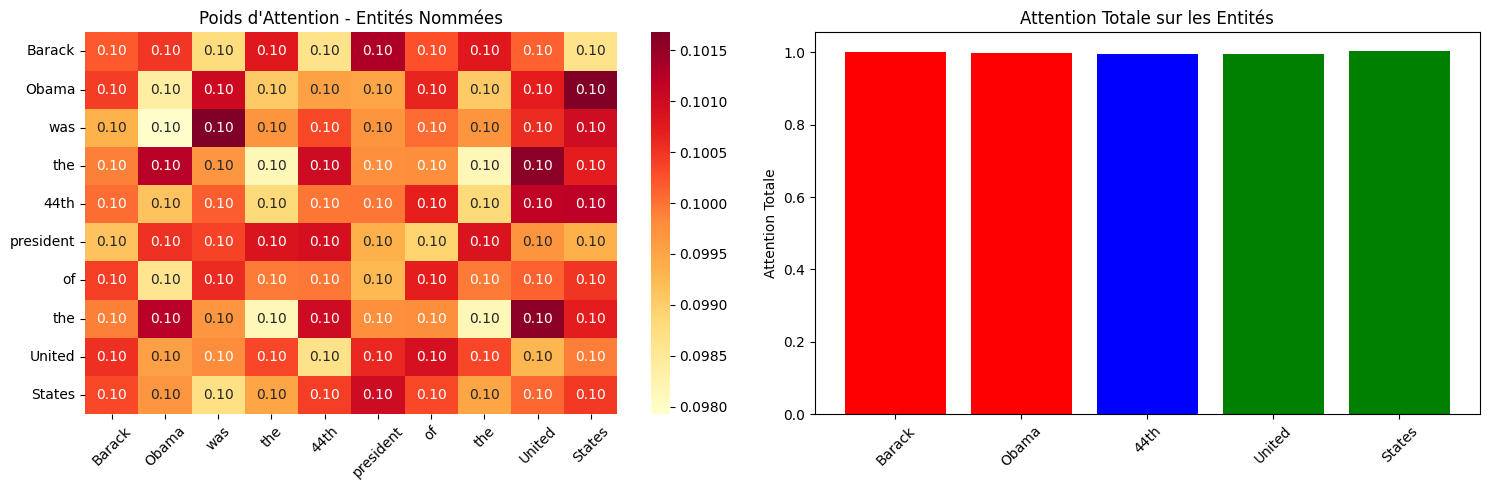

ANALYSE DES ENTITÉS NOMMÉES:

1. Attention sur 'Barack Obama':
   'Barack' → Obama: 0.100, Barack: 0.100
   'Obama' → Obama: 0.098, Barack: 0.100
   'the' → Obama: 0.101, Barack: 0.100
   '44th' → Obama: 0.099, Barack: 0.100
   'president' → Obama: 0.101, Barack: 0.099
   'of' → Obama: 0.099, Barack: 0.100
   'the' → Obama: 0.101, Barack: 0.100
   'United' → Obama: 0.100, Barack: 0.101
   'States' → Obama: 0.100, Barack: 0.100

2. Attention sur 'United States':
   'Barack' → United: 0.101, States: 0.100
   'Obama' → United: 0.099, States: 0.101
   'was' → United: 0.100, States: 0.101
   'the' → United: 0.098, States: 0.102
   '44th' → United: 0.099, States: 0.101
   'president' → United: 0.101, States: 0.100
   'of' → United: 0.100, States: 0.100
   'the' → United: 0.098, States: 0.102
   'United' → United: 0.100, States: 0.099
   'States' → United: 0.100, States: 0.100

3. Auto-attention des entités:
   'Barack': 0.100
   'Obama': 0.098
   'United': 0.098
   'States': 0.099


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

def layer_norm(x, eps=1e-6):
    mean = np.mean(x, axis=-1, keepdims=True)
    std = np.std(x, axis=-1, keepdims=True)
    return (x - mean) / (std + eps)

def self_attention(inputs, Wq, Wk, Wv):
    Q = np.dot(inputs, Wq)
    K = np.dot(inputs, Wk)
    V = np.dot(inputs, Wv)

    scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])
    attention_weights = softmax(scores)
    output = np.dot(attention_weights, V)

    return attention_weights, output

print("=== PARTIE 1: Entités Nommées ===\n")

named_entity_sentence = "Barack Obama was the 44th president of the United States".split()
vocab_size = len(named_entity_sentence)

print(f"Phrase: {' '.join(named_entity_sentence)}")
print(f"Entités nommées: 'Barack Obama', 'United States', '44th'\n")

word_to_index = {word: idx for idx, word in enumerate(named_entity_sentence)}
embeddings = np.eye(vocab_size)
inputs = np.array([embeddings[word_to_index[word]] for word in named_entity_sentence])

np.random.seed(42)
Wq = np.random.randn(vocab_size, vocab_size) * 0.1
Wk = np.random.randn(vocab_size, vocab_size) * 0.1
Wv = np.random.randn(vocab_size, vocab_size) * 0.1

attention_weights, attention_output = self_attention(inputs, Wq, Wk, Wv)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.heatmap(attention_weights, annot=True, fmt='.2f', cmap='YlOrRd',
            xticklabels=named_entity_sentence, yticklabels=named_entity_sentence)
plt.title('Poids d\'Attention - Entités Nommées')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

entity_positions = {
    'Barack': 0, 'Obama': 1, '44th': 3, 'United': 7, 'States': 8
}

plt.subplot(1, 2, 2)
entities = ['Barack', 'Obama', '44th', 'United', 'States']
attention_on_entities = []

for entity in entities:
    pos = entity_positions[entity]
    attention_received = attention_weights[:, pos].sum()
    attention_on_entities.append(attention_received)

plt.bar(entities, attention_on_entities, color=['red', 'red', 'blue', 'green', 'green'])
plt.title('Attention Totale sur les Entités')
plt.xticks(rotation=45)
plt.ylabel('Attention Totale')

plt.tight_layout()
plt.show()

print("ANALYSE DES ENTITÉS NOMMÉES:")
print("=" * 50)

print("\n1. Attention sur 'Barack Obama':")
for i, word in enumerate(named_entity_sentence):
    attention_to_obama = attention_weights[i, 1]
    attention_to_barack = attention_weights[i, 0]
    if attention_to_obama > 0.1 or attention_to_barack > 0.1:
        print(f"   '{word}' → Obama: {attention_to_obama:.3f}, Barack: {attention_to_barack:.3f}")

print("\n2. Attention sur 'United States':")
for i, word in enumerate(named_entity_sentence):
    attention_to_united = attention_weights[i, 7]
    attention_to_states = attention_weights[i, 8]
    if attention_to_united > 0.1 or attention_to_states > 0.1:
        print(f"   '{word}' → United: {attention_to_united:.3f}, States: {attention_to_states:.3f}")

print("\n3. Auto-attention des entités:")
for entity in ['Barack', 'Obama', 'United', 'States']:
    pos = entity_positions[entity]
    self_attention_val = attention_weights[pos, pos]
    print(f"   '{entity}': {self_attention_val:.3f}")





=== PARTIE 2: Traduction Séquentielle ===

Phrase source: I love machine learning
Phrase cible: J adore l apprentissage automatique


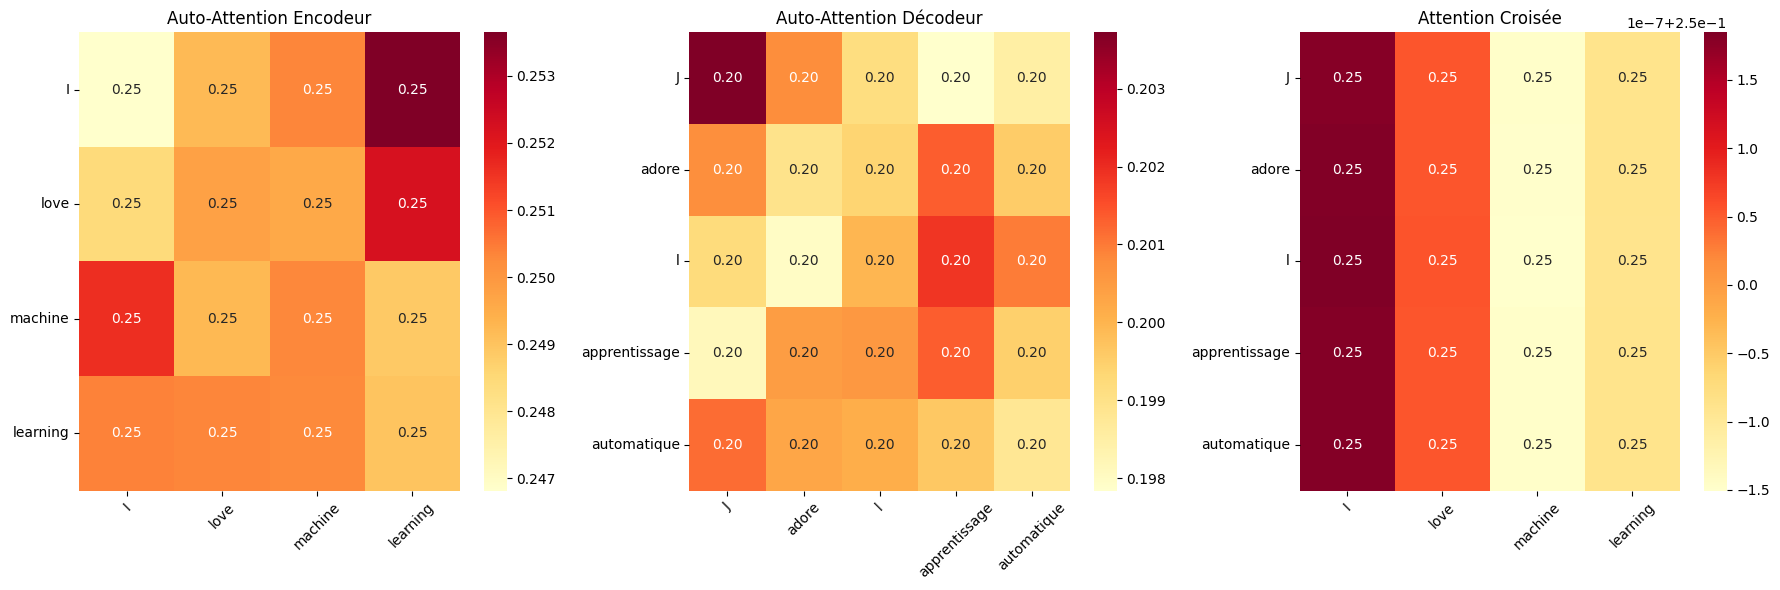


ANALYSE DES ALIGNEMENTS:

Alignements observés:
   'I' → 'J': 0.250
   'love' → 'adore': 0.250
   'machine' → 'apprentissage': 0.250
   'learning' → 'automatique': 0.250


In [29]:
print("\n\n=== PARTIE 2: Traduction Séquentielle ===")

encoder_sentence = "I love machine learning".split()
decoder_sentence = "J adore l apprentissage automatique".split()

print(f"\nPhrase source: {' '.join(encoder_sentence)}")
print(f"Phrase cible: {' '.join(decoder_sentence)}")

encoder_vocab_size = len(encoder_sentence)
decoder_vocab_size = len(decoder_sentence)

encoder_word_to_index = {word: idx for idx, word in enumerate(encoder_sentence)}
decoder_word_to_index = {word: idx for idx, word in enumerate(decoder_sentence)}

encoder_embeddings = np.eye(encoder_vocab_size)
decoder_embeddings = np.eye(decoder_vocab_size)

encoder_inputs = np.array([encoder_embeddings[encoder_word_to_index[word]] for word in encoder_sentence])
decoder_inputs = np.array([decoder_embeddings[decoder_word_to_index[word]] for word in decoder_sentence])

np.random.seed(42)
Wq_encoder = np.random.randn(encoder_vocab_size, encoder_vocab_size) * 0.1
Wk_encoder = np.random.randn(encoder_vocab_size, encoder_vocab_size) * 0.1
Wv_encoder = np.random.randn(encoder_vocab_size, encoder_vocab_size) * 0.1

Wq_decoder = np.random.randn(decoder_vocab_size, decoder_vocab_size) * 0.1
Wk_decoder = np.random.randn(decoder_vocab_size, decoder_vocab_size) * 0.1
Wv_decoder = np.random.randn(decoder_vocab_size, decoder_vocab_size) * 0.1

Wq_cross = np.random.randn(decoder_vocab_size, encoder_vocab_size) * 0.1
Wk_cross = np.random.randn(encoder_vocab_size, encoder_vocab_size) * 0.1
Wv_cross = np.random.randn(encoder_vocab_size, encoder_vocab_size) * 0.1

encoder_attention_weights, encoder_output = self_attention(encoder_inputs, Wq_encoder, Wk_encoder, Wv_encoder)
decoder_attention_weights, decoder_output = self_attention(decoder_inputs, Wq_decoder, Wk_decoder, Wv_decoder)

Q_cross = np.dot(decoder_output, Wq_cross)
K_cross = np.dot(encoder_output, Wk_cross)
V_cross = np.dot(encoder_output, Wv_cross)

cross_attention_scores = np.dot(Q_cross, K_cross.T) / np.sqrt(K_cross.shape[1])
cross_attention_weights = softmax(cross_attention_scores)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.heatmap(encoder_attention_weights, annot=True, fmt='.2f', cmap='YlOrRd',
            xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Auto-Attention Encodeur')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.subplot(1, 3, 2)
sns.heatmap(decoder_attention_weights, annot=True, fmt='.2f', cmap='YlOrRd',
            xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Auto-Attention Décodeur')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.subplot(1, 3, 3)
sns.heatmap(cross_attention_weights, annot=True, fmt='.2f', cmap='YlOrRd',
            xticklabels=encoder_sentence, yticklabels=decoder_sentence)
plt.title('Attention Croisée')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

print("\nANALYSE DES ALIGNEMENTS:")
print("=" * 50)

expected_alignments = [
    ("I", "J"),
    ("love", "adore"),
    ("machine", "apprentissage"),
    ("learning", "automatique")
]

print("\nAlignements observés:")
for src_word, tgt_word in expected_alignments:
    if src_word in encoder_word_to_index and tgt_word in decoder_word_to_index:
        src_idx = encoder_word_to_index[src_word]
        tgt_idx = decoder_word_to_index[tgt_word]
        alignment_strength = cross_attention_weights[tgt_idx, src_idx]
        print(f"   '{src_word}' → '{tgt_word}': {alignment_strength:.3f}")





=== PARTIE 3: Classification de Texte ===

Données d'entraînement:
   this movie is absolutely wonderful and fantastic   → POSITIF
   terrible horrible disgusting awful movie           → NÉGATIF
   amazing brilliant spectacular performance          → POSITIF
   boring tedious dull uninteresting film             → NÉGATIF
   outstanding exceptional marvelous acting           → POSITIF
   pathetic lame disappointing waste                  → NÉGATIF

Taille du vocabulaire: 28

RÉSULTATS:

Phrase: this film is brilliant and amazing
Prédiction: POSITIF
Probabilités [Négatif: 0.250, Positif: 0.750]


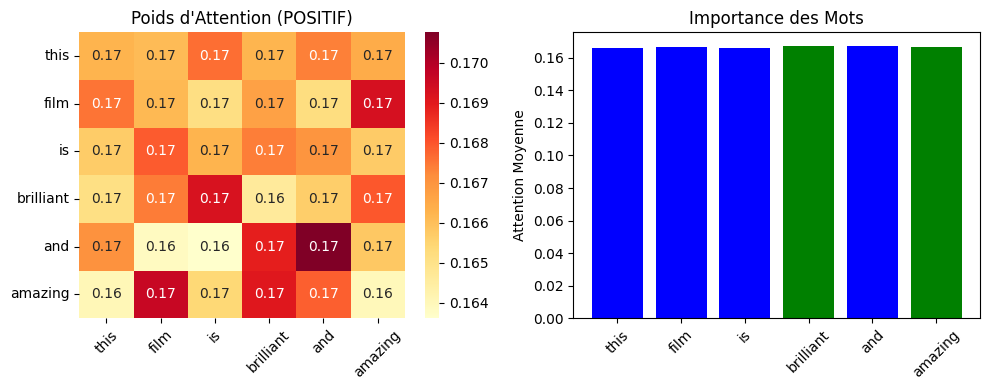


Mots importants:
   'this': 0.166
   'film': 0.167
   'is': 0.166
   'brilliant': 0.167
   'and': 0.167
   'amazing': 0.167

Phrase: awful terrible disappointing movie
Prédiction: NÉGATIF
Probabilités [Négatif: 0.926, Positif: 0.074]


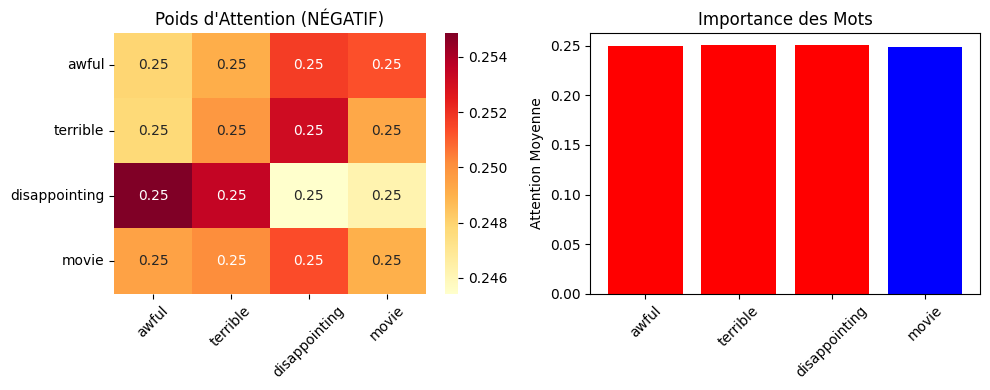


Mots importants:
   'awful': 0.250
   'terrible': 0.251
   'disappointing': 0.250
   'movie': 0.249

ANALYSE DU MODÈLE

Précision entraînement: 1.000

Attention sur mots polarisants:
   Mots positif: 0.2230
   Mots negatif: 0.2150


In [30]:
print("\n\n=== PARTIE 3: Classification de Texte ===")

training_sentences = [
    "this movie is absolutely wonderful and fantastic".split(),
    "terrible horrible disgusting awful movie".split(),
    "amazing brilliant spectacular performance".split(),
    "boring tedious dull uninteresting film".split(),
    "outstanding exceptional marvelous acting".split(),
    "pathetic lame disappointing waste".split()
]

sentiments = [1, 0, 1, 0, 1, 0]

print("\nDonnées d'entraînement:")
for sent, sentiment in zip(training_sentences, sentiments):
    sentiment_str = "POSITIF" if sentiment == 1 else "NÉGATIF"
    print(f"   {' '.join(sent):<50} → {sentiment_str}")

test_sentences = [
    "this film is brilliant and amazing".split(),
    "awful terrible disappointing movie".split()
]

all_words = set()
for sent in training_sentences + test_sentences:
    all_words.update(sent)

vocab = list(all_words)
vocab_size = len(vocab)
word_to_index = {word: idx for idx, word in enumerate(vocab)}

print(f"\nTaille du vocabulaire: {vocab_size}")

def extract_attention_features(sentence, Wq, Wk, Wv):
    embeddings = np.eye(vocab_size)
    inputs = np.array([embeddings[word_to_index[word]] for word in sentence])

    attention_weights, attention_output = self_attention(inputs, Wq, Wk, Wv)

    feature_output = attention_output.mean(axis=0)

    return feature_output, attention_weights

np.random.seed(42)
Wq_cls = np.random.randn(vocab_size, vocab_size) * 0.1
Wk_cls = np.random.randn(vocab_size, vocab_size) * 0.1
Wv_cls = np.random.randn(vocab_size, vocab_size) * 0.1

X_train = []
attention_maps = []

for sentence in training_sentences:
    features, att_weights = extract_attention_features(sentence, Wq_cls, Wk_cls, Wv_cls)
    X_train.append(features)
    attention_maps.append(att_weights)

X_train = np.array(X_train)
y_train = np.array(sentiments)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

classifier = LogisticRegression(random_state=42)
classifier.fit(X_train_scaled, y_train)

print("\nRÉSULTATS:")
print("=" * 50)

for i, test_sentence in enumerate(test_sentences):
    features, test_attention_weights = extract_attention_features(test_sentence, Wq_cls, Wk_cls, Wv_cls)
    features_scaled = scaler.transform([features])
    prediction = classifier.predict(features_scaled)[0]
    probability = classifier.predict_proba(features_scaled)[0]

    sentiment_str = "POSITIF" if prediction == 1 else "NÉGATIF"
    print(f"\nPhrase: {' '.join(test_sentence)}")
    print(f"Prédiction: {sentiment_str}")
    print(f"Probabilités [Négatif: {probability[0]:.3f}, Positif: {probability[1]:.3f}]")

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.heatmap(test_attention_weights, annot=True, fmt='.2f', cmap='YlOrRd',
                xticklabels=test_sentence, yticklabels=test_sentence)
    plt.title(f'Poids d\'Attention ({sentiment_str})')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)

    plt.subplot(1, 2, 2)
    word_importance = test_attention_weights.mean(axis=0)
    colors = ['green' if word in ['brilliant', 'amazing'] else
              'red' if word in ['awful', 'terrible', 'disappointing'] else
              'blue' for word in test_sentence]

    plt.bar(test_sentence, word_importance, color=colors)
    plt.title('Importance des Mots')
    plt.xticks(rotation=45)
    plt.ylabel('Attention Moyenne')

    plt.tight_layout()
    plt.show()

    print("\nMots importants:")
    for j, word in enumerate(test_sentence):
        importance = word_importance[j]
        if importance > 0.15:
            print(f"   '{word}': {importance:.3f}")

print("\n" + "=" * 50)
print("ANALYSE DU MODÈLE")
print("=" * 50)

print(f"\nPrécision entraînement: {classifier.score(X_train_scaled, y_train):.3f}")

polarizing_words = {
    'positif': ['wonderful', 'fantastic', 'amazing', 'brilliant', 'spectacular',
                'outstanding', 'exceptional', 'marvelous'],
    'negatif': ['terrible', 'horrible', 'disgusting', 'awful', 'boring',
                'tedious', 'dull', 'pathetic', 'lame', 'disappointing']
}

print("\nAttention sur mots polarisants:")
for sentiment, words in polarizing_words.items():
    total_attention = 0
    count = 0

    for i, sentence in enumerate(training_sentences):
        att_weights = attention_maps[i]
        for j, word in enumerate(sentence):
            if word in words:
                attention_received = att_weights[:, j].mean()
                total_attention += attention_received
                count += 1

    if count > 0:
        avg_attention = total_attention / count
        print(f"   Mots {sentiment}: {avg_attention:.4f}")
